In [1]:
#set working directory
import os, sys
os.chdir('/Users/pinskylab/Documents/GitHub/regional_coral_manuscript/')
os.getcwd()

'/Users/pinskylab/Documents/GitHub/regional_coral_manuscript'

In [2]:
#import packages
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
import random
from matplotlib.lines import Line2D
import matplotlib.pylab as pylab
import pandas as pd
import scipy
from scipy import stats
import seaborn as sns

# Figure S1

In [3]:
#Import SST files
SST45_Carib = np.load("./Caribbean/input/Caribbean_sst45_yearly_GISS.npy")
SST45_SWP = np.load("./SouthwestPacific/input/SWP_SST_45_yearly.npy")
SST45_CT = np.load("./CoralTriangle/input/Indonesia_SST_45_yearly_obs_2083.npy")
SST85_Carib = np.load("./Caribbean/input/Caribbean_sst85_yearly_GISS.npy")
SST85_SWP = np.load("./SouthwestPacific/input/SWP_SST_85_yearly.npy")
SST85_CT = np.load("./CoralTriangle/input/Indonesia_SST_85_yearly_obs_2083.npy")

np.shape(SST45_Carib)
SST45_Carib_2300 = SST45_Carib[:,430]
SST45_SWP_2300 = SST45_SWP[:,430]
SST45_CT_2300 = SST45_CT[:,430]
SST85_Carib_2300 = SST85_Carib[:,430]
SST85_SWP_2300 = SST85_SWP[:,430]
SST85_CT_2300 = SST85_CT[:,430]

In [4]:
#Import area files

Area_C = np.load("./Caribbean/input/Caribbean_reef_areas.npy")
Area_SWP = np.load("./SouthwestPacific/input/SWP_reef_area.npy")
Area_SWP = Area_SWP*1000000
Area_CT = np.load("./CoralTriangle/input/Indonesia_reef_area_2083.npy")

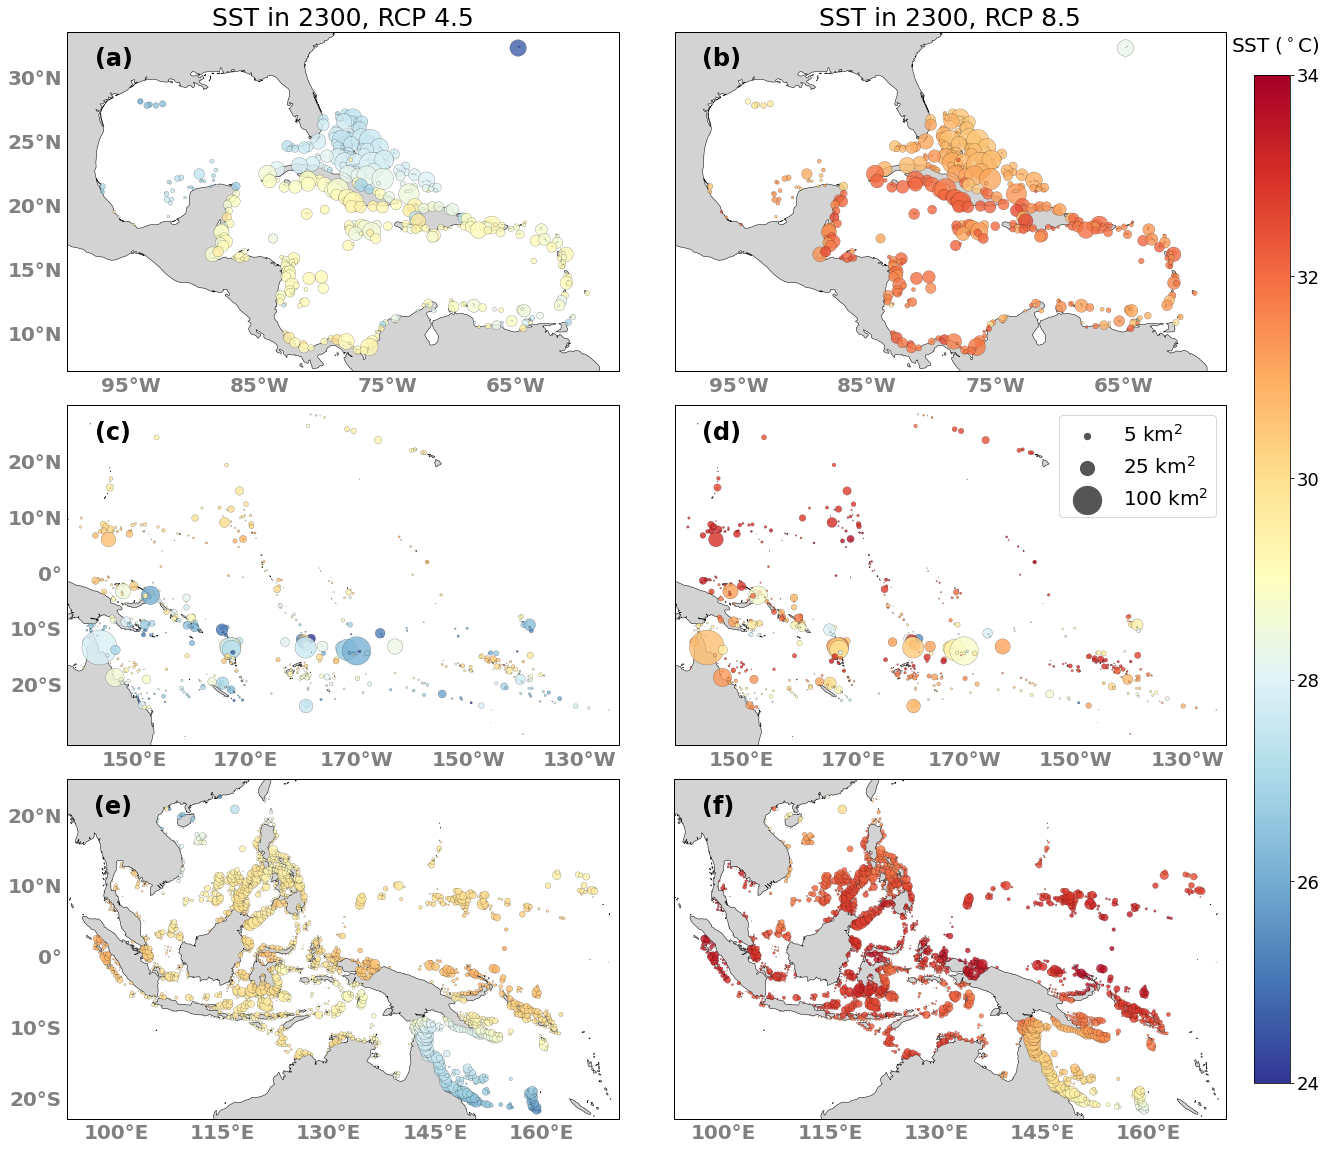

In [5]:
#Plot figure
def main():
    fig, ax = plt.subplots(3, 2, figsize = (25,20))
    plt.subplots_adjust(wspace=0, hspace=0.1)
    np.vectorize(lambda ax:ax.axis('off'))(ax)
    
    # Caribbean
    ax[0,0] = fig.add_subplot(3,2, 1, projection=ccrs.PlateCarree())
    ax[0,0].set_extent([-100, -57, 7, 33.5], crs=ccrs.PlateCarree())
    land_50m = cfeature.NaturalEarthFeature('physical', 'coastline', '50m',
                                        edgecolor='black',linewidth = 0.5,
                                        facecolor='lightgray')
    ax[0,0].add_feature(land_50m)
    lat = np.genfromtxt("./Caribbean/input/Caribbean_lat.csv")
    lon = np.genfromtxt("./Caribbean/input/Caribbean_lon.csv")
    gl = ax[0,0].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 20, 'color': 'gray', 'weight': 'bold'}
    gl.ylabel_style = {'size': 20, 'color': 'gray', 'weight': 'bold'}
    gl.xlocator = mticker.FixedLocator([-95, -85, -75, -65])
    gl.ylocator = mticker.FixedLocator([10, 15, 20,25,30])
    sc = ax[0,0].scatter(lon, lat+0.05, c = SST45_Carib_2300, cmap = 'RdYlBu_r', vmin = 24, vmax = 34,s = Area_C/8000000, alpha = 0.8,linewidth = 0.2, edgecolor = 'k', label = 'reef patch', zorder = 2)
    ax[0,0].set_title('SST in 2300, RCP 4.5', fontsize = 25)
    ax[0,0].axis('off')
   
    # SWP
    ax[1,0] = fig.add_subplot(3,2, 3, projection=ccrs.PlateCarree(180))
    ax[1,0].set_extent([138,237, -31, 30], crs=ccrs.PlateCarree())
    land_50m = cfeature.NaturalEarthFeature('physical', 'coastline', '50m',
                                        edgecolor='black',linewidth = 0.5,
                                        facecolor='lightgray')
    ax[1,0].add_feature(land_50m)
    gl = ax[1,0].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 20, 'color': 'gray', 'weight': 'bold'}
    gl.ylabel_style = {'size': 20, 'color': 'gray', 'weight': 'bold'}
    gl.xlocator = mticker.FixedLocator([150, 170, -170, -150, -130])
    gl.ylocator = mticker.FixedLocator([-20, -10,0, 10,20])
    lat = np.genfromtxt("./SouthwestPacific/input/SWP_lat.csv")
    lon = np.genfromtxt("./SouthwestPacific/input/SWP_lon.csv")
    sc = ax[1,0].scatter(lon+180, lat, c = SST45_SWP_2300, cmap = 'RdYlBu_r', vmin = 24, vmax = 34,s = Area_SWP/8000000, alpha = 0.8,linewidth = 0.2, edgecolor = 'k', label = 'reef patch', zorder = 2)

    
    # CT
    ax[2,0] = fig.add_subplot(3,2, 5, projection=ccrs.PlateCarree())
    ax[2,0].set_extent([93,171, -23, 25], crs=ccrs.PlateCarree())
    land_50m = cfeature.NaturalEarthFeature('physical', 'coastline', '50m',
                                        edgecolor='black',linewidth = 0.5,
                                        facecolor='lightgray')
    ax[2,0].add_feature(land_50m)
    gl = ax[2,0].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 20, 'color': 'gray', 'weight': 'bold'}
    gl.ylabel_style = {'size': 20, 'color': 'gray', 'weight': 'bold'}
    gl.xlocator = mticker.FixedLocator([100, 115,130, 145, 160])
    gl.ylocator = mticker.FixedLocator([-20, -10,0, 10,20])
    lat = np.load("./CoralTriangle/input/Data_Lat_wholeCT_2083.npy")
    lon = np.load("./CoralTriangle/input/Data_Lon_wholeCT_2083.npy")
    lat = lat
    lon = lon
    sc = ax[2,0].scatter(lon, lat, c = SST45_CT_2300, cmap = 'RdYlBu_r', vmin = 24, vmax = 34,s = Area_CT/8000000, alpha = 0.8,linewidth = 0.2, edgecolor = 'k', label = 'reef patch', zorder = 2)
    fig.subplots_adjust(right=0.8)

    
     # Caribbean
    ax[0,1] = fig.add_subplot(3,2, 2, projection=ccrs.PlateCarree())
    ax[0,1].set_extent([-100, -57, 7, 33.5], crs=ccrs.PlateCarree())
    land_50m = cfeature.NaturalEarthFeature('physical', 'coastline', '50m',
                                        edgecolor='black',linewidth = 0.5,
                                        facecolor='lightgray')
    ax[0,1].add_feature(land_50m)
    lat = np.genfromtxt("./Caribbean/input/Caribbean_lat.csv")
    lon = np.genfromtxt("./Caribbean/input/Caribbean_lon.csv")
    gl = ax[0,1].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 20, 'color': 'gray', 'weight': 'bold'}
    gl.ylabel_style = {'size': 0, 'color': 'white', 'weight': 'bold'}
    gl.xlocator = mticker.FixedLocator([-95, -85, -75, -65])
    sc = ax[0,1].scatter(lon, lat+0.05, c = SST85_Carib_2300, cmap = 'RdYlBu_r', vmin = 24, vmax = 34,s = Area_C/8000000, alpha = 0.8,linewidth = 0.2, edgecolor = 'k', label = 'reef patch', zorder = 2)
    ax[0,1].set_title('SST in 2300, RCP 8.5', fontsize = 25)
    ax[0,1].axis('off')
   
    # SWP
    ax[1,1] = fig.add_subplot(3,2, 4, projection=ccrs.PlateCarree(180))
    ax[1,1].set_extent([138,237, -31, 30], crs=ccrs.PlateCarree())
    land_50m = cfeature.NaturalEarthFeature('physical', 'coastline', '50m',
                                        edgecolor='black',linewidth = 0.5,
                                        facecolor='lightgray')
    ax[1,1].add_feature(land_50m)
    gl = ax[1,1].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 20, 'color': 'gray', 'weight': 'bold'}
    gl.ylabel_style = {'size': 0, 'color': 'white', 'weight': 'bold'}
    gl.xlocator = mticker.FixedLocator([150, 170, -170, -150, -130])
    lat = np.genfromtxt("./SouthwestPacific/input/SWP_lat.csv")
    lon = np.genfromtxt("./SouthwestPacific/input/SWP_lon.csv")
    sc = ax[1,1].scatter(lon+180, lat, c = SST85_SWP_2300, cmap = 'RdYlBu_r', vmin = 24, vmax = 34,s = Area_SWP/8000000, alpha = 0.8, linewidth = 0.2, edgecolor = 'k', label = 'reef patch', zorder = 2)

    
    # CT
    ax[2,1] = fig.add_subplot(3,2, 6, projection=ccrs.PlateCarree())
    ax[2,1].set_extent([93,171, -23, 25], crs=ccrs.PlateCarree())
    land_50m = cfeature.NaturalEarthFeature('physical', 'coastline', '50m',
                                        edgecolor='black',linewidth = 0.5,
                                        facecolor='lightgray')
    ax[2,1].add_feature(land_50m)
    gl = ax[2,1].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 20, 'color': 'gray', 'weight': 'bold'}
    gl.ylabel_style = {'size': 0, 'color': 'white', 'weight': 'bold'}
    gl.xlocator = mticker.FixedLocator([100, 115,130, 145, 160])
    lat = np.load("./CoralTriangle/input/Data_Lat_wholeCT_2083.npy")
    lon = np.load("./CoralTriangle/input/Data_Lon_wholeCT_2083.npy")
    lat = lat
    lon = lon
    sc = ax[2,1].scatter(lon, lat, c = SST85_CT_2300, cmap = 'RdYlBu_r', vmin = 24, vmax = 34,s = Area_CT/8000000, alpha = 0.8, linewidth = 0.2, edgecolor = 'k', label = 'reef patch', zorder = 2)
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.8, 0.15, 0.02, 0.7])
    cbar = fig.colorbar(sc, cax=cbar_ax, alpha = 1.5)
    cbar.ax.tick_params(labelsize=18)
    cbar.set_label('SST ($^\circ$C)', labelpad=-45, y=1.04, rotation=0, fontsize = 20)
    cbar.set_alpha(1)
    cbar.draw_all()
    
    ax[0,0].annotate("(a)", xy=(0.05, 0.9), xycoords="axes fraction", fontsize = 24, fontweight='bold')
    ax[0,1].annotate("(b)", xy=(0.05, 0.9), xycoords="axes fraction", fontsize = 24, fontweight='bold')
    ax[1,0].annotate("(c)", xy=(0.05, 0.9), xycoords="axes fraction", fontsize = 24, fontweight='bold')
    ax[1,1].annotate("(d)", xy=(0.05, 0.9), xycoords="axes fraction", fontsize = 24, fontweight='bold')
    ax[2,0].annotate("(e)", xy=(0.05, 0.9), xycoords="axes fraction", fontsize = 24, fontweight='bold')
    ax[2,1].annotate("(f)", xy=(0.05, 0.9), xycoords="axes fraction", fontsize = 24, fontweight='bold')
    
    gll = plt.scatter([],[], s=40, marker='o', color='#555555')
    gl = plt.scatter([],[], s=200, marker='o', color='#555555')
    ga = plt.scatter([],[], s=800, marker='o', color='#555555')

    ax[1,1].legend((gll,gl,ga),
        ('5 km$^2$', '25 km$^2$', '100 km$^2$'),
       scatterpoints=1,
       loc='upper right',
       ncol=1,
       fontsize=20)
    

    #fig.savefig('./output/initial&mincover_map.png',dpi=300, bbox_inches='tight')
if __name__ == '__main__':
    main()

# Figure S2

In [6]:
# Import files

region = 'Caribbean'
hindcast_N = np.load("./output/"+str(region)+"/N_hindcast_"+str(region)+"_beta_0.5_V_0.01_mpa_0.0_algmax_1.0_H_0.npy")
hindcast_Z = np.load("./output/"+str(region)+"/Z_hindcast_"+str(region)+"_beta_0.5_V_0.01_mpa_0.0_algmax_1.0_H_0.npy")
year_H = np.load("./output/"+str(region)+"/year_hindcast_"+str(region)+"_beta_0.5_V_0.01_mpa_0.0_algmax_1.0_H_0.npy")
forecast_N = np.load("./output/"+str(region)+"/N_forecast1_"+str(region)+"_beta_0.5_V_0.01_mpa_0.0_algmax_1.0_45_0.npy")
forecast_Z = np.load("./output/"+str(region)+"/Z_forecast1_"+str(region)+"_beta_0.5_V_0.01_mpa_0.0_algmax_1.0_45_0.npy")
year_F =np.load("./output/"+str(region)+"/year_forecast1_"+str(region)+"_beta_0.5_V_0.01_mpa_0.0_algmax_1.0_45_0.npy")   
year_Carib = np.concatenate((year_H,year_F+148), axis = 0)
N_Carib = np.concatenate((hindcast_N,forecast_N), axis = 0)
Z_Carib = np.concatenate((hindcast_Z,forecast_Z), axis = 0)

region = 'SWP'
hindcast_N = np.load("./output/"+str(region)+"/N_hindcast_"+str(region)+"_beta_0.5_V_0.01_mpa_none0.0_algmax_1.0_H_0.npy")
hindcast_Z = np.load("./output/"+str(region)+"/Z_hindcast_"+str(region)+"_beta_0.5_V_0.01_mpa_none0.0_algmax_1.0_H_0.npy")
year_H = np.load("./output/"+str(region)+"/year_hindcast_"+str(region)+"_beta_0.5_V_0.01_mpa_none0.0_algmax_1.0_H_0.npy")
forecast_N = np.load("./output/"+str(region)+"/N_forecast1_"+str(region)+"_beta_0.5_V_0.01_mpa_none0.0_algmax_1.0_45_0.npy")
forecast_Z = np.load("./output/"+str(region)+"/Z_forecast1_"+str(region)+"_beta_0.5_V_0.01_mpa_none0.0_algmax_1.0_45_0.npy")
year_F =np.load("./output/"+str(region)+"/year_forecast1_"+str(region)+"_beta_0.5_V_0.01_mpa_none0.0_algmax_1.0_45_0.npy")   
year_SWP = np.concatenate((year_H,year_F+148), axis = 0)
N_SWP = np.concatenate((hindcast_N,forecast_N), axis = 0)
Z_SWP = np.concatenate((hindcast_Z,forecast_Z), axis = 0)

region = 'CT'
hindcast_N = np.load("./output/"+str(region)+"/N_hindcast_"+str(region)+"_beta_0.5_V_0.01_mpa_none0.0_algmax_1.0_H_0.npy")
hindcast_Z = np.load("./output/"+str(region)+"/Z_hindcast_"+str(region)+"_beta_0.5_V_0.01_mpa_none0.0_algmax_1.0_H_0.npy")
year_H = np.load("./output/"+str(region)+"/year_hindcast_"+str(region)+"_beta_0.5_V_0.01_mpa_none0.0_algmax_1.0_H_0.npy")
forecast_N = np.load("./output/"+str(region)+"/N_forecast1_"+str(region)+"_beta_0.5_V_0.01_mpa_none0.0_algmax_1.0_45_0.npy")
forecast_Z = np.load("./output/"+str(region)+"/Z_forecast1_"+str(region)+"_beta_0.5_V_0.01_mpa_none0.0_algmax_1.0_45_0.npy")
year_F =np.load("./output/"+str(region)+"/year_forecast1_"+str(region)+"_beta_0.5_V_0.01_mpa_none0.0_algmax_1.0_45_0.npy")
year_CT = np.concatenate((year_H,year_F+148), axis = 0)
N_CT = np.concatenate((hindcast_N,forecast_N), axis = 0)
Z_CT = np.concatenate((hindcast_Z,forecast_Z), axis = 0)

In [7]:
N_Carib_both = np.add(N_Carib[:,:,0],N_Carib[:,:,1])
Zw1 = (N_Carib[:,:,0]/N_Carib_both)*Z_Carib[:,:,0]
Zw2 = (N_Carib[:,:,1]/N_Carib_both)*Z_Carib[:,:,1]
Z_Carib_w = np.add(Zw1,Zw2)

N_SWP_both = np.add(N_SWP[:,:,0],N_SWP[:,:,1])
Zw1 = (N_SWP[:,:,0]/N_SWP_both)*Z_SWP[:,:,0]
Zw2 = (N_SWP[:,:,1]/N_SWP_both)*Z_SWP[:,:,1]
Z_SWP_w = np.add(Zw1,Zw2)

N_CT_both = np.add(N_CT[:,:,0],N_CT[:,:,1])
Zw1 = (N_CT[:,:,0]/N_CT_both)*Z_CT[:,:,0]
Zw2 = (N_CT[:,:,1]/N_CT_both)*Z_CT[:,:,1]
Z_CT_w = np.add(Zw1,Zw2)

In [8]:
#Set year labels and designate years
yearlabs = ['1870','1970','2070','2170','2270']
years = [0,100,200,300,400]

In [9]:
#random sample of sites for plot
rand_C = random.sample(range(0, 423), 100)
rand_SWP = random.sample(range(0, 583), 100)
rand_CT = random.sample(range(0, 2083), 100)

In [10]:
# Change plot parameters
params = {'legend.fontsize': 17,
         # 'figure.figsize': (15, 5),
         'axes.labelsize': 25,
         'axes.titlesize':25,
         'xtick.labelsize':18,
         'ytick.labelsize':18}


pylab.rcParams.update(params)

Text(0.05, 0.88, '(f)')

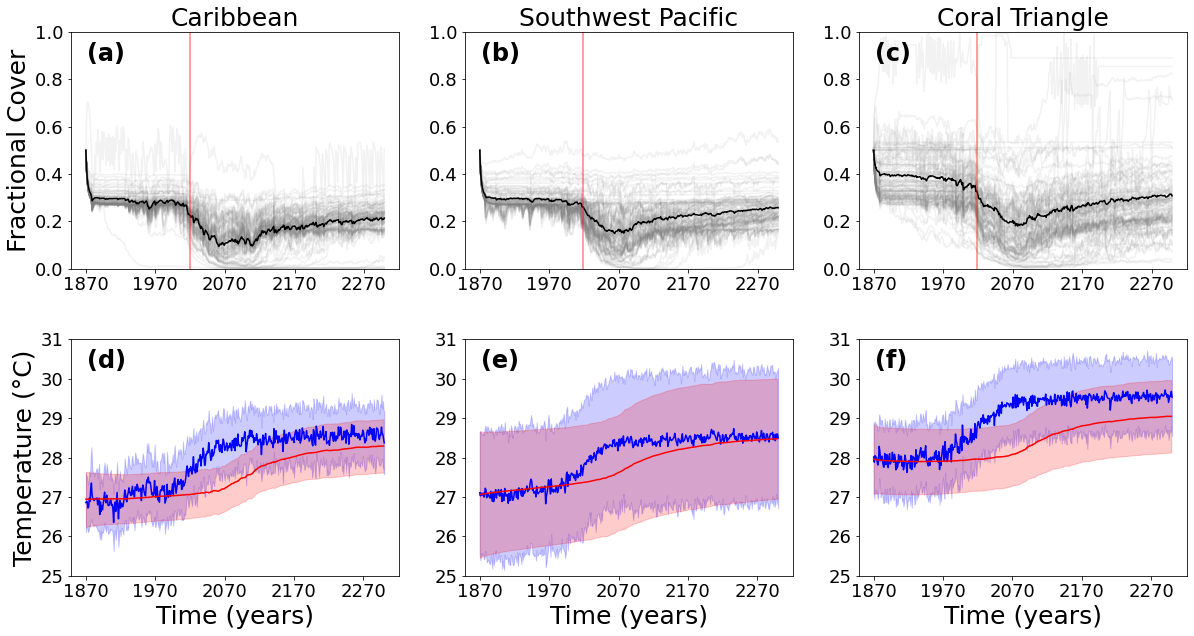

In [11]:
fig, ax = plt.subplots(2, 3, figsize = (20,10))
plt.subplots_adjust(wspace=0.2, hspace=0.3)

custom_lines = [Line2D([0], [0], color='lightgray', lw=4),
                Line2D([0], [0], color='black', lw=4),
                Line2D([0], [0], color='red', lw=4, alpha = 0.5)]

N = N_Carib
year = year_Carib
Nall = N[:,:,0]+N[:,:,1]
ax[0,0].plot(year, Nall[:,rand_C], c = 'gray', alpha = 0.1)
N_mean = np.mean(Nall, axis = 1)
ax[0,0].plot(year,N_mean, c = 'black')
ax[0,0].axvline(x=149, color = 'red', alpha = 0.5)

ax[0,0].set_title('Caribbean')
#ax[0,0].set_xlabel('time (yrs)')
ax[0,0].set_ylabel('Fractional Cover')
#ax[0,0].legend(handles = custom_lines, labels = ['example reefs', 'mean', 'forecast start'])
ax[0,0].set_xticks(years)
ax[0,0].set_xticklabels(yearlabs)
ax[0,0].set_ylim([0,1])

N = N_SWP
year = year_SWP
Nall = N[:,:,0]+N[:,:,1]
ax[0,1].plot(year, Nall[:,rand_SWP], c = 'gray', alpha = 0.1)
N_mean = np.mean(Nall, axis = 1)
ax[0,1].plot(year,N_mean, c = 'black')
ax[0,1].axvline(x=149, color = 'red', alpha = 0.5)

ax[0,1].set_title('Southwest Pacific')
#ax[0,1].set_xlabel('Time (years)')
#ax[0,1].set_ylabel('Coral Cover')
#ax[1,0].legend(handles = custom_lines, labels = ['example reefs', 'mean', 'forecast start'])
ax[0,1].set_xticks(years)
ax[0,1].set_xticklabels(yearlabs)
ax[0,1].set_ylim([0,1])

N = N_CT
year = year_CT
Nall = N[:,:,0]+N[:,:,1]
ax[0,2].plot(year, Nall[:,rand_CT], c = 'gray', alpha = 0.1)
N_mean = np.mean(Nall, axis = 1)
ax[0,2].plot(year,N_mean, c = 'black')
ax[0,2].axvline(x=149, color = 'red', alpha = 0.5)

#fig.suptitle('coral cover', fontsize = 20 )
#ax[0,2].set_xlabel('time (yrs)')
#ax[0,2].set_ylabel('fractional cover')
#ax[0,1].legend(handles = custom_lines, labels = ['example reefs', 'mean', 'forecast start'])
ax[0,2].set_xticks(years)
ax[0,2].set_xticklabels(yearlabs)
ax[0,2].set_ylim([0,1])
ax[0,2].set_title('Coral Triangle')


t = u"\u00b0"
mylabels = ('RCP 4.5', 'RCP 8.5')
year = year_Carib
SST45 = SST45_Carib
SST_mean_45 = SST45.mean(axis=0)
SST_std_45 = SST45.std(axis=0)
Z = Z_Carib_w
Z_mean = Z.mean(axis=1)
Z_std = Z.std(axis=1)
ax[1,0].plot(SST_mean_45 ,color='blue')
ax[1,0].fill_between(np.arange(0,SST_mean_45.shape[0]),SST_mean_45-SST_std_45,SST_mean_45+SST_std_45, 
                 alpha=0.2, edgecolor='blue', facecolor='blue')
ax[1,0].plot(year_Carib,Z_mean, color='red')
ax[1,0].fill_between(year_Carib,Z_mean-Z_std,Z_mean+Z_std, 
                 alpha=0.2, edgecolor='red', facecolor='red')
ax[1,0].set_xlabel('Time (years)')
ax[1,0].set_xticks([0,100,200,300,400])
ax[1,0].set_xticklabels(['1870', '1970', '2070', '2170', '2270'])
ax[1,0].set_ylabel('Temperature ('+ t +'C)')
#ax[1,0].set_title('Carib SST Time Series 1870-2300', fontsize = 18)
ax[1,0].set_ylim([25,31])

t = u"\u00b0"
mylabels = ('RCP 4.5', 'RCP 8.5')
year = year_SWP
SST45 = SST45_SWP
SST_mean_45 = SST45.mean(axis=0)
SST_std_45 = SST45.std(axis=0)
Z = Z_SWP_w
Z_mean = Z.mean(axis=1)
Z_std = Z.std(axis=1)
ax[1,1].plot(SST_mean_45 ,color='blue')
ax[1,1].fill_between(np.arange(0,SST_mean_45.shape[0]),SST_mean_45-SST_std_45,SST_mean_45+SST_std_45, 
                 alpha=0.2, edgecolor='blue', facecolor='blue')
ax[1,1].plot(year_SWP,Z_mean, color='red')
ax[1,1].fill_between(year_SWP,Z_mean-Z_std,Z_mean+Z_std, 
                 alpha=0.2, edgecolor='red', facecolor='red')
ax[1,1].set_xlabel('Time (years)')
ax[1,1].set_xticks([0,100,200,300,400])
ax[1,1].set_xticklabels(['1870', '1970', '2070', '2170', '2270'])
#ax[1,1].set_ylabel('Temperature ('+ t +'C)')
#ax[1,0].set_title('Carib SST Time Series 1870-2300', fontsize = 18)
ax[1,1].set_ylim([25,31])

t = u"\u00b0"
mylabels = ('RCP 4.5', 'RCP 8.5')
year = year_CT
SST45 = SST45_CT
SST_mean_45 = SST45.mean(axis=0)
SST_std_45 = SST45.std(axis=0)
Z = Z_CT_w
Z_mean = Z.mean(axis=1)
Z_std = Z.std(axis=1)
ax[1,2].plot(SST_mean_45 ,color='blue')
ax[1,2].fill_between(np.arange(0,SST_mean_45.shape[0]),SST_mean_45-SST_std_45,SST_mean_45+SST_std_45, 
                 alpha=0.2, edgecolor='blue', facecolor='blue')
ax[1,2].plot(year,Z_mean, color='red')
ax[1,2].fill_between(year,Z_mean-Z_std,Z_mean+Z_std, 
                 alpha=0.2, edgecolor='red', facecolor='red')
ax[1,2].set_xlabel('Time (years)')
ax[1,2].set_xticks([0,100,200,300,400])
ax[1,2].set_xticklabels(['1870', '1970', '2070', '2170', '2270'])
ax[1,2].set_ylim([25,31])




ax[0,0].annotate("(a)", xy=(0.05, 0.88), xycoords="axes fraction", fontsize = 24, fontweight='bold')
ax[0,1].annotate("(b)", xy=(0.05, 0.88), xycoords="axes fraction", fontsize = 24, fontweight='bold')
ax[0,2].annotate("(c)", xy=(0.05, 0.88), xycoords="axes fraction", fontsize = 24, fontweight='bold')
ax[1,0].annotate("(d)", xy=(0.05, 0.88), xycoords="axes fraction", fontsize = 24, fontweight='bold')
ax[1,1].annotate("(e)", xy=(0.05, 0.88), xycoords="axes fraction", fontsize = 24, fontweight='bold')
ax[1,2].annotate("(f)", xy=(0.05, 0.88), xycoords="axes fraction", fontsize = 24, fontweight='bold')

#ax[1,1].axis('off')
#ax[1,1].legend(handles = custom_lines, labels = ['example reefs', 'mean', 'forecast start'], loc = 10, fontsize = 'xx-large')
#plt.savefig('./trajectories_V0.01B0.5.png',dpi=300, bbox_inches='tight')

# Figure S3

In [14]:
# Import files

region = 'Caribbean'
hindcast_N = np.load("./output/"+str(region)+"/N_hindcast_"+str(region)+"_beta_0.5_V_0.01_mpa_0.0_algmax_1.0_H_0.npy")
year_H = np.load("./output/"+str(region)+"/year_hindcast_"+str(region)+"_beta_0.5_V_0.01_mpa_0.0_algmax_1.0_H_0.npy")
forecast_N = np.load("./output/"+str(region)+"/N_forecast2_"+str(region)+"_beta_0.5_V_0.01_mpa_0.0_algmax_1.0_85_0.npy")
year_F =np.load("./output/"+str(region)+"/year_forecast2_"+str(region)+"_beta_0.5_V_0.01_mpa_0.0_algmax_1.0_85_0.npy")   
year_Carib = np.concatenate((year_H,year_F+148), axis = 0)
N_Carib = np.concatenate((hindcast_N,forecast_N), axis = 0)
Z0 = np.load("./output/"+str(region)+"/Z_hindcast_"+str(region)+"_beta_0.5_V_0.01_mpa_0.0_algmax_1.0_H_0.npy")
Z1 = np.load("./output/"+str(region)+"/Z_forecast2_"+str(region)+"_beta_0.5_V_0.01_mpa_0.0_algmax_1.0_85_0.npy")
Carib_Z = np.concatenate((Z0,Z1), axis = 0)

region = 'SWP'
hindcast_N = np.load("./output/"+str(region)+"/N_hindcast_"+str(region)+"_beta_0.5_V_0.01_mpa_none0.0_algmax_1.0_H_0.npy")
year_H = np.load("./output/"+str(region)+"/year_hindcast_"+str(region)+"_beta_0.5_V_0.01_mpa_none0.0_algmax_1.0_H_0.npy")
forecast_N = np.load("./output/"+str(region)+"/N_forecast2_"+str(region)+"_beta_0.5_V_0.01_mpa_none0.0_algmax_1.0_85_0.npy")
year_F =np.load("./output/"+str(region)+"/year_forecast2_"+str(region)+"_beta_0.5_V_0.01_mpa_none0.0_algmax_1.0_85_0.npy")   
year_SWP = np.concatenate((year_H,year_F+148), axis = 0)
N_SWP = np.concatenate((hindcast_N,forecast_N), axis = 0)
Z0 = np.load("./output/"+str(region)+"/Z_hindcast_"+str(region)+"_beta_0.5_V_0.01_mpa_none0.0_algmax_1.0_H_0.npy")
Z1 = np.load("./output/"+str(region)+"/Z_forecast2_"+str(region)+"_beta_0.5_V_0.01_mpa_none0.0_algmax_1.0_85_0.npy")  
SWP_Z = np.concatenate((Z0,Z1), axis = 0)


region = 'CT'
hindcast_N = np.load("./output/"+str(region)+"/N_hindcast_"+str(region)+"_beta_0.5_V_0.01_mpa_none0.0_algmax_1.0_H_0.npy")
year_H = np.load("./output/"+str(region)+"/year_hindcast_"+str(region)+"_beta_0.5_V_0.01_mpa_none0.0_algmax_1.0_H_0.npy")
forecast_N = np.load("./output/"+str(region)+"/N_forecast2_"+str(region)+"_beta_0.5_V_0.01_mpa_none0.0_algmax_1.0_85_0.npy")
year_F =np.load("./output/"+str(region)+"/year_forecast2_"+str(region)+"_beta_0.5_V_0.01_mpa_none0.0_algmax_1.0_85_0.npy")
year_CT = np.concatenate((year_H,year_F+148), axis = 0)
N_CT = np.concatenate((hindcast_N,forecast_N), axis = 0)
Z0 = np.load("./output/"+str(region)+"/Z_hindcast_"+str(region)+"_beta_0.5_V_0.01_mpa_none0.0_algmax_1.0_H_0.npy")
Z1 = np.load("./output/"+str(region)+"/Z_forecast2_"+str(region)+"_beta_0.5_V_0.01_mpa_none0.0_algmax_1.0_85_0.npy")
CT_Z = np.concatenate((Z0,Z1), axis = 0)

SST85_Carib = np.load("./Caribbean/input/Caribbean_sst85_yearly_GISS.npy")
SST85_SWP = np.load("./SouthwestPacific/input/SWP_SST_85_yearly.npy")
SST85_CT = np.load("./CoralTriangle/input/Indonesia_SST_85_yearly_obs_2083.npy")

In [16]:
N_Carib_both = np.add(N_Carib[:,:,0],N_Carib[:,:,1])
Zw1 = (N_Carib[:,:,0]/N_Carib_both)*Carib_Z[:,:,0]
Zw2 = (N_Carib[:,:,1]/N_Carib_both)*Carib_Z[:,:,1]
Z_Carib_w = np.add(Zw1,Zw2)

N_SWP_both = np.add(N_SWP[:,:,0],N_SWP[:,:,1])
Zw1 = (N_SWP[:,:,0]/N_SWP_both)*SWP_Z[:,:,0]
Zw2 = (N_SWP[:,:,1]/N_SWP_both)*SWP_Z[:,:,1]
Z_SWP_w = np.add(Zw1,Zw2)

N_CT_both = np.add(N_CT[:,:,0],N_CT[:,:,1])
Zw1 = (N_CT[:,:,0]/N_CT_both)*CT_Z[:,:,0]
Zw2 = (N_CT[:,:,1]/N_CT_both)*CT_Z[:,:,1]
Z_CT_w = np.add(Zw1,Zw2)

Text(0.05, 0.88, '(f)')

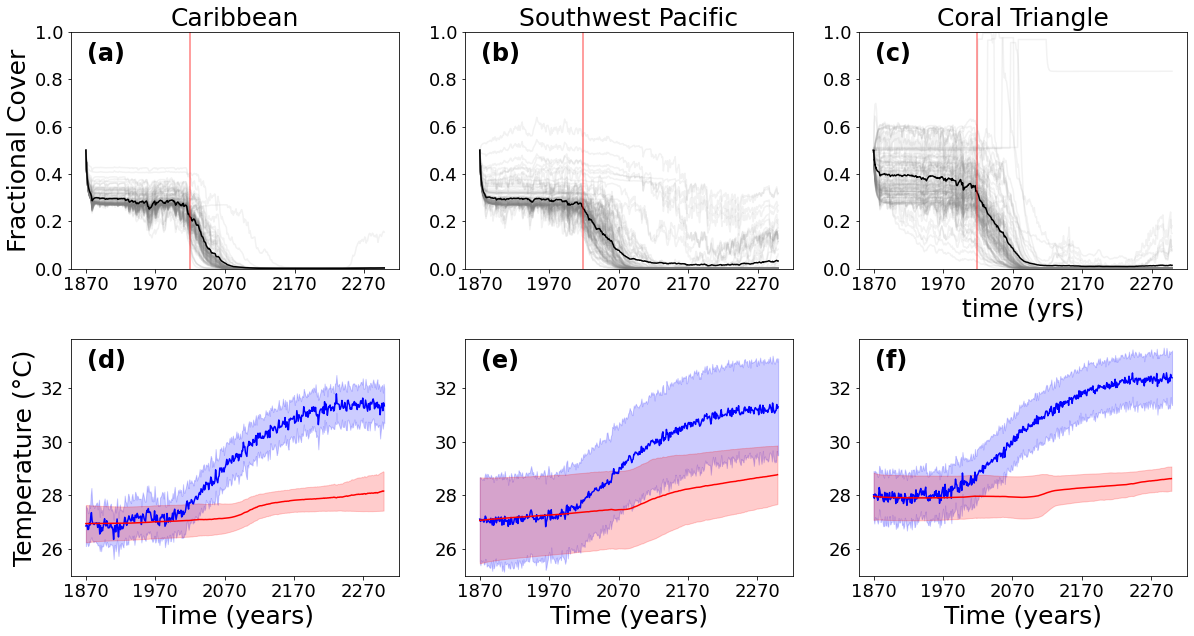

In [18]:
from matplotlib.lines import Line2D

fig, ax = plt.subplots(2, 3, figsize = (20,10))
plt.subplots_adjust(wspace=0.2, hspace=0.3)

custom_lines = [Line2D([0], [0], color='lightgray', lw=4),
                Line2D([0], [0], color='black', lw=4),
                Line2D([0], [0], color='red', lw=4, alpha = 0.5)]

rand_C = random.sample(range(0, 423), 100)
rand_SWP = random.sample(range(0, 583), 100)
rand_CT = random.sample(range(0, 2083), 100)
N = N_Carib
year = year_Carib
Nall = N[:,:,0]+N[:,:,1]
ax[0,0].plot(year, Nall[:,rand_C], c = 'gray', alpha = 0.1)
N_mean = np.mean(Nall, axis = 1)
ax[0,0].plot(year,N_mean, c = 'black')
ax[0,0].axvline(x=149, color = 'red', alpha = 0.5)

ax[0,0].set_title('Caribbean')
#ax[0,0].set_xlabel('time (yrs)')
ax[0,0].set_ylabel('Fractional Cover')
#ax[0,0].legend(handles = custom_lines, labels = ['example reefs', 'mean', 'forecast start'])
ax[0,0].set_xticks(years)
ax[0,0].set_xticklabels(yearlabs)
ax[0,0].set_ylim([0,1])

N = N_SWP
year = year_SWP
Nall = N[:,:,0]+N[:,:,1]
ax[0,1].plot(year, Nall[:,rand_SWP], c = 'gray', alpha = 0.1)
N_mean = np.mean(Nall, axis = 1)
ax[0,1].plot(year,N_mean, c = 'black')
ax[0,1].axvline(x=149, color = 'red', alpha = 0.5)

ax[0,1].set_title('Southwest Pacific')
#ax[0,1].set_xlabel('time (yrs)')
#ax[0,1].set_ylabel('fractional cover')
#ax[1,0].legend(handles = custom_lines, labels = ['example reefs', 'mean', 'forecast start'])
ax[0,1].set_xticks(years)
ax[0,1].set_xticklabels(yearlabs)
ax[0,1].set_ylim([0,1])

N = N_CT
year = year_CT
Nall = N[:,:,0]+N[:,:,1]
ax[0,2].plot(year, Nall[:,rand_CT], c = 'gray', alpha = 0.1)
N_mean = np.mean(Nall, axis = 1)
ax[0,2].plot(year,N_mean, c = 'black')
ax[0,2].axvline(x=149, color = 'red', alpha = 0.5)
ax[0,2].set_xticks([0,100,200,300,400])
ax[0,2].set_xticklabels(['1870', '1970', '2070', '2170', '2270'])

#fig.suptitle('coral cover', fontsize = 20 )
ax[0,2].set_xlabel('time (yrs)')
#ax[0,2].set_ylabel('fractional cover')
#ax[0,1].legend(handles = custom_lines, labels = ['example reefs', 'mean', 'forecast start'])
#ax[0,2].set_xticks(years)
ax[0,2].set_xticklabels(yearlabs)
ax[0,2].set_ylim([0,1])
ax[0,2].set_title('Coral Triangle')


t = u"\u00b0"
mylabels = ('RCP 4.5', 'RCP 8.5')
year = year_Carib
SST45 = SST85_Carib
SST_mean_45 = SST45.mean(axis=0)
SST_std_45 = SST45.std(axis=0)
Z = Z_Carib_w
Z_mean = Z.mean(axis=1)
Z_std = Z.std(axis=1)
ax[1,0].plot(SST_mean_45 ,color='blue')
ax[1,0].fill_between(np.arange(0,SST_mean_45.shape[0]),SST_mean_45-SST_std_45,SST_mean_45+SST_std_45, 
                 alpha=0.2, edgecolor='blue', facecolor='blue')
ax[1,0].plot(year_Carib,Z_mean, color='red')
ax[1,0].fill_between(year_Carib,Z_mean-Z_std,Z_mean+Z_std, 
                 alpha=0.2, edgecolor='red', facecolor='red')
ax[1,0].set_xlabel('Time (years)')
ax[1,0].set_xticks([0,100,200,300,400])
ax[1,0].set_xticklabels(['1870', '1970', '2070', '2170', '2270'])
ax[1,0].set_ylabel('Temperature ('+ t +'C)')
#ax[1,0].set_title('Carib SST Time Series 1870-2300', fontsize = 18)
ax[1,0].set_ylim([25,33.8])

t = u"\u00b0"
mylabels = ('RCP 4.5', 'RCP 8.5')
year = year_SWP
SST45 = SST85_SWP
SST_mean_45 = SST45.mean(axis=0)
SST_std_45 = SST45.std(axis=0)
Z = Z_SWP_w
Z_mean = Z.mean(axis=1)
Z_std = Z.std(axis=1)
ax[1,1].plot(SST_mean_45 ,color='blue')
ax[1,1].fill_between(np.arange(0,SST_mean_45.shape[0]),SST_mean_45-SST_std_45,SST_mean_45+SST_std_45, 
                 alpha=0.2, edgecolor='blue', facecolor='blue')
ax[1,1].plot(year_SWP,Z_mean, color='red')
ax[1,1].fill_between(year_SWP,Z_mean-Z_std,Z_mean+Z_std, 
                 alpha=0.2, edgecolor='red', facecolor='red')
ax[1,1].set_xlabel('Time (years)')
ax[1,1].set_xticks([0,100,200,300,400])
ax[1,1].set_xticklabels(['1870', '1970', '2070', '2170', '2270'])
#ax[1,1].set_ylabel('Temperature ('+ t +'C)')
#ax[1,0].set_title('Carib SST Time Series 1870-2300', fontsize = 18)
ax[1,1].set_ylim([25,33.8])

t = u"\u00b0"
mylabels = ('RCP 4.5', 'RCP 8.5')
year = year_CT[0:]
SST45 = SST85_CT
SST_mean_45 = SST45.mean(axis=0)
SST_std_45 = SST45.std(axis=0)
Z = Z_CT_w
Z_mean = Z.mean(axis=1)
Z_std = Z.std(axis=1)
ax[1,2].plot(SST_mean_45 ,color='blue')
ax[1,2].fill_between(np.arange(0,SST_mean_45.shape[0]),SST_mean_45-SST_std_45,SST_mean_45+SST_std_45, 
                 alpha=0.2, edgecolor='blue', facecolor='blue')
ax[1,2].plot(year,Z_mean, color='red')
ax[1,2].fill_between(year,Z_mean-Z_std,Z_mean+Z_std, 
                 alpha=0.2, edgecolor='red', facecolor='red')
ax[1,2].set_xlabel('Time (years)')
ax[1,2].set_xticks([0,100,200,300,400])
ax[1,2].set_xticklabels(['1870', '1970', '2070', '2170', '2270'])
#ax[1,2].set_ylabel('Temperature ('+ t +'C)')
#ax[1,0].set_title('Carib SST Time Series 1870-2300', fontsize = 18)
ax[1,2].set_ylim([25,33.8])

ax[0,0].annotate("(a)", xy=(0.05, 0.88), xycoords="axes fraction", fontsize = 24, fontweight='bold')
ax[0,1].annotate("(b)", xy=(0.05, 0.88), xycoords="axes fraction", fontsize = 24, fontweight='bold')
ax[0,2].annotate("(c)", xy=(0.05, 0.88), xycoords="axes fraction", fontsize = 24, fontweight='bold')
ax[1,0].annotate("(d)", xy=(0.05, 0.88), xycoords="axes fraction", fontsize = 24, fontweight='bold')
ax[1,1].annotate("(e)", xy=(0.05, 0.88), xycoords="axes fraction", fontsize = 24, fontweight='bold')
ax[1,2].annotate("(f)", xy=(0.05, 0.88), xycoords="axes fraction", fontsize = 24, fontweight='bold')


#ax[1,1].axis('off')
#ax[1,1].legend(handles = custom_lines, labels = ['example reefs', 'mean', 'forecast start'], loc = 10, fontsize = 'xx-large')
#plt.savefig('./trajectories_V0.01B0.5.png',dpi=300, bbox_inches='tight')

# Figure S4

In [22]:
# Import files

# RCP 4.5
region = 'Caribbean'
hindcast_N = np.load("./output/"+str(region)+"/N_hindcast_"+str(region)+"_beta_0.5_V_0.01_mpa_0.0_algmax_1.0_H_0.npy")
year_H = np.load("./output/"+str(region)+"/year_hindcast_"+str(region)+"_beta_0.5_V_0.01_mpa_0.0_algmax_1.0_H_0.npy")
forecast_N = np.load("./output/"+str(region)+"/N_forecast1_"+str(region)+"_beta_0.5_V_0.01_mpa_0.0_algmax_1.0_45_0.npy")
year_F =np.load("./output/"+str(region)+"/year_forecast1_"+str(region)+"_beta_0.5_V_0.01_mpa_0.0_algmax_1.0_45_0.npy")   
year_Carib = np.concatenate((year_H,year_F+148), axis = 0)
N45_Carib = np.concatenate((hindcast_N,forecast_N), axis = 0)


region = 'SWP'
hindcast_N = np.load("./output/"+str(region)+"/N_hindcast_"+str(region)+"_beta_0.5_V_0.01_mpa_none0.0_algmax_1.0_H_0.npy")
year_H = np.load("./output/"+str(region)+"/year_hindcast_"+str(region)+"_beta_0.5_V_0.01_mpa_none0.0_algmax_1.0_H_0.npy")
forecast_N = np.load("./output/"+str(region)+"/N_forecast1_"+str(region)+"_beta_0.5_V_0.01_mpa_none0.0_algmax_1.0_45_0.npy")
year_F =np.load("./output/"+str(region)+"/year_forecast1_"+str(region)+"_beta_0.5_V_0.01_mpa_none0.0_algmax_1.0_45_0.npy")   
year_SWP = np.concatenate((year_H,year_F+148), axis = 0)
N45_SWP = np.concatenate((hindcast_N,forecast_N), axis = 0)


region = 'CT'
hindcast_N = np.load("./output/"+str(region)+"/N_hindcast_"+str(region)+"_beta_0.5_V_0.01_mpa_none0.0_algmax_1.0_H_0.npy")
year_H = np.load("./output/"+str(region)+"/year_hindcast_"+str(region)+"_beta_0.5_V_0.01_mpa_none0.0_algmax_1.0_H_0.npy")
forecast_N = np.load("./output/"+str(region)+"/N_forecast1_"+str(region)+"_beta_0.5_V_0.01_mpa_none0.0_algmax_1.0_45_0.npy")
year_F =np.load("./output/"+str(region)+"/year_forecast1_"+str(region)+"_beta_0.5_V_0.01_mpa_none0.0_algmax_1.0_45_0.npy")
year_CT = np.concatenate((year_H,year_F+148), axis = 0)
N45_CT = np.concatenate((hindcast_N,forecast_N), axis = 0)

# RCP 8.5
region = 'Caribbean'
hindcast_N = np.load("./output/"+str(region)+"/N_hindcast_"+str(region)+"_beta_0.5_V_0.01_mpa_0.0_algmax_1.0_H_0.npy")
year_H = np.load("./output/"+str(region)+"/year_hindcast_"+str(region)+"_beta_0.5_V_0.01_mpa_0.0_algmax_1.0_H_0.npy")
forecast_N = np.load("./output/"+str(region)+"/N_forecast2_"+str(region)+"_beta_0.5_V_0.01_mpa_0.0_algmax_1.0_85_0.npy")
year_F =np.load("./output/"+str(region)+"/year_forecast2_"+str(region)+"_beta_0.5_V_0.01_mpa_0.0_algmax_1.0_85_0.npy")   
year_Carib = np.concatenate((year_H,year_F+148), axis = 0)
N85_Carib = np.concatenate((hindcast_N,forecast_N), axis = 0)


region = 'SWP'
hindcast_N = np.load("./output/"+str(region)+"/N_hindcast_"+str(region)+"_beta_0.5_V_0.01_mpa_none0.0_algmax_1.0_H_0.npy")
year_H = np.load("./output/"+str(region)+"/year_hindcast_"+str(region)+"_beta_0.5_V_0.01_mpa_none0.0_algmax_1.0_H_0.npy")
forecast_N = np.load("./output/"+str(region)+"/N_forecast2_"+str(region)+"_beta_0.5_V_0.01_mpa_none0.0_algmax_1.0_85_0.npy")
year_F =np.load("./output/"+str(region)+"/year_forecast2_"+str(region)+"_beta_0.5_V_0.01_mpa_none0.0_algmax_1.0_85_0.npy")   
year_SWP = np.concatenate((year_H,year_F+148), axis = 0)
N85_SWP = np.concatenate((hindcast_N,forecast_N), axis = 0)


region = 'CT'
hindcast_N = np.load("./output/"+str(region)+"/N_hindcast_"+str(region)+"_beta_0.5_V_0.01_mpa_none0.0_algmax_1.0_H_0.npy")
year_H = np.load("./output/"+str(region)+"/year_hindcast_"+str(region)+"_beta_0.5_V_0.01_mpa_none0.0_algmax_1.0_H_0.npy")
forecast_N = np.load("./output/"+str(region)+"/N_forecast2_"+str(region)+"_beta_0.5_V_0.01_mpa_none0.0_algmax_1.0_85_0.npy")
year_F =np.load("./output/"+str(region)+"/year_forecast2_"+str(region)+"_beta_0.5_V_0.01_mpa_none0.0_algmax_1.0_85_0.npy")
year_CT = np.concatenate((year_H,year_F+148), axis = 0)
N85_CT = np.concatenate((hindcast_N,forecast_N), axis = 0)

In [23]:
#define final cover values for RCP 4.5
N = N45_Carib
N_all = N[:,:,0]+N[:,:,1]
cover_2300_Carib = N_all[-1,:]

N = N45_SWP
N_all = N[:,:,0]+N[:,:,1]
cover_2300_SWP = N_all[-1,:]

N = N45_CT
N_all = N[:,:,0]+N[:,:,1]
cover_2300_CT = N_all[-1,:]

#define final cover values for RCP 8.5
N = N85_Carib
N_all = N[:,:,0]+N[:,:,1]
cover_2300_Carib_85 = N_all[-1,:]

N = N85_SWP
N_all = N[:,:,0]+N[:,:,1]
cover_2300_SWP_85 = N_all[-1,:]

N = N85_CT
N_all = N[:,:,0]+N[:,:,1]
cover_2300_CT_85 = N_all[-1,:]

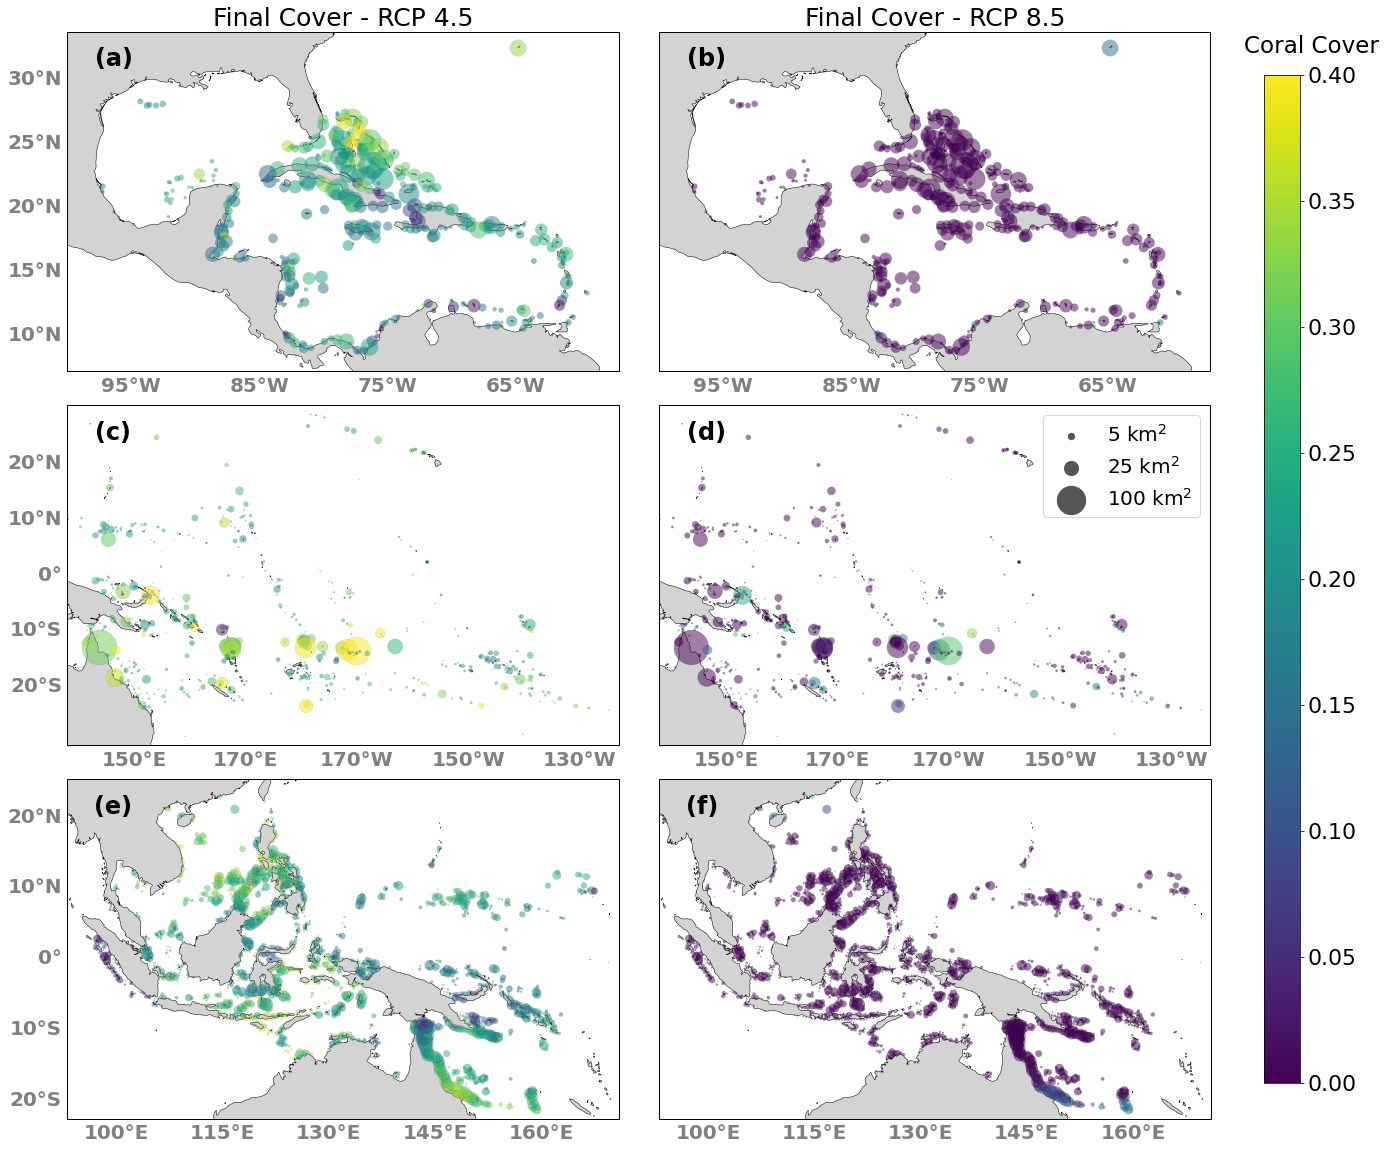

In [24]:

def main():
    fig, ax = plt.subplots(3, 2, figsize = (25,20))
    plt.subplots_adjust(wspace=-0.05, hspace=0.1)
    np.vectorize(lambda ax:ax.axis('off'))(ax)
    
    # Caribbean
    ax[0,0] = fig.add_subplot(3,2, 1, projection=ccrs.PlateCarree())
    ax[0,0].set_extent([-100, -57, 7, 33.5], crs=ccrs.PlateCarree())
    land_50m = cfeature.NaturalEarthFeature('physical', 'coastline', '50m',
                                        edgecolor='black',linewidth = 0.5,
                                        facecolor='lightgray')
    ax[0,0].add_feature(land_50m)
    lat = np.genfromtxt("./Caribbean/input/Caribbean_lat.csv")
    lon = np.genfromtxt("./Caribbean/input/Caribbean_lon.csv")
    gl = ax[0,0].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 20, 'color': 'gray', 'weight': 'bold'}
    gl.ylabel_style = {'size': 20, 'color': 'gray', 'weight': 'bold'}
    gl.xlocator = mticker.FixedLocator([-95, -85, -75, -65])
    gl.ylocator = mticker.FixedLocator([10, 15, 20,25,30])
    sc = ax[0,0].scatter(lon, lat+0.05, c = cover_2300_Carib, cmap = 'viridis', vmin = 0, vmax = 0.4,s = Area_C/8000000, alpha = 0.5,linewidth = 0.1, edgecolor = 'k', label = 'reef patch', zorder = 2)
    ax[0,0].set_title('Final Cover - RCP 4.5', fontsize = 25)
    ax[0,0].axis('off')
   
    # SWP
    ax[1,0] = fig.add_subplot(3,2, 3, projection=ccrs.PlateCarree(180))
    ax[1,0].set_extent([138,237, -31, 30], crs=ccrs.PlateCarree())
    land_50m = cfeature.NaturalEarthFeature('physical', 'coastline', '50m',
                                        edgecolor='black',linewidth = 0.5,
                                        facecolor='lightgray')
    ax[1,0].add_feature(land_50m)
    gl = ax[1,0].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 20, 'color': 'gray', 'weight': 'bold'}
    gl.ylabel_style = {'size': 20, 'color': 'gray', 'weight': 'bold'}
    gl.xlocator = mticker.FixedLocator([150, 170, -170, -150, -130])
    gl.ylocator = mticker.FixedLocator([-20, -10,0, 10,20])
    lat = np.genfromtxt("./SouthwestPacific/input/SWP_lat.csv")
    lon = np.genfromtxt("./SouthwestPacific/input/SWP_lon.csv")
    sc = ax[1,0].scatter(lon+180, lat, c = cover_2300_SWP, cmap = 'viridis', vmin = 0, vmax = 0.4,s = Area_SWP/8000000, alpha = 0.5,linewidth = 0.1, edgecolor = 'k', label = 'reef patch', zorder = 2)

    
    # CT
    ax[2,0] = fig.add_subplot(3,2, 5, projection=ccrs.PlateCarree())
    ax[2,0].set_extent([93,171, -23, 25], crs=ccrs.PlateCarree())
    land_50m = cfeature.NaturalEarthFeature('physical', 'coastline', '50m',
                                        edgecolor='black',linewidth = 0.5,
                                        facecolor='lightgray')
    ax[2,0].add_feature(land_50m)
    gl = ax[2,0].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 20, 'color': 'gray', 'weight': 'bold'}
    gl.ylabel_style = {'size': 20, 'color': 'gray', 'weight': 'bold'}
    gl.xlocator = mticker.FixedLocator([100, 115,130, 145, 160])
    gl.ylocator = mticker.FixedLocator([-20, -10,0, 10,20])
    lat = np.load("./CoralTriangle/input/Data_Lat_wholeCT_2083.npy")
    lon = np.load("./CoralTriangle/input/Data_Lon_wholeCT_2083.npy")
    lat = lat
    lon = lon
    sc = ax[2,0].scatter(lon, lat, c = cover_2300_CT, cmap = 'viridis', vmin = 0, vmax = 0.4,s = Area_CT/8000000, alpha = 0.5,linewidth = 0.1, edgecolor = 'k', label = 'reef patch', zorder = 2)
    fig.subplots_adjust(right=0.8)

    
     # Caribbean
    ax[0,1] = fig.add_subplot(3,2, 2, projection=ccrs.PlateCarree())
    ax[0,1].set_extent([-100, -57, 7, 33.5], crs=ccrs.PlateCarree())
    land_50m = cfeature.NaturalEarthFeature('physical', 'coastline', '50m',
                                        edgecolor='black',linewidth = 0.5,
                                        facecolor='lightgray')
    ax[0,1].add_feature(land_50m)
    lat = np.genfromtxt("./Caribbean/input/Caribbean_lat.csv")
    lon = np.genfromtxt("./Caribbean/input/Caribbean_lon.csv")
    gl = ax[0,1].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 20, 'color': 'gray', 'weight': 'bold'}
    gl.ylabel_style = {'size': 0, 'color': 'white', 'weight': 'bold'}
    gl.xlocator = mticker.FixedLocator([-95, -85, -75, -65])
    sc = ax[0,1].scatter(lon, lat+0.05, c = cover_2300_Carib_85, cmap = 'viridis', vmin = 0, vmax = 0.4,s = Area_C/8000000, alpha = 0.5,linewidth = 0.1, edgecolor = 'k', label = 'reef patch', zorder = 2)
    ax[0,1].set_title('Final Cover - RCP 8.5', fontsize = 25)
    ax[0,1].axis('off')
   
    # SWP
    ax[1,1] = fig.add_subplot(3,2, 4, projection=ccrs.PlateCarree(180))
    ax[1,1].set_extent([138,237, -31, 30], crs=ccrs.PlateCarree())
    land_50m = cfeature.NaturalEarthFeature('physical', 'coastline', '50m',
                                        edgecolor='black',linewidth = 0.5,
                                        facecolor='lightgray')
    ax[1,1].add_feature(land_50m)
    gl = ax[1,1].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 20, 'color': 'gray', 'weight': 'bold'}
    gl.ylabel_style = {'size': 0, 'color': 'white', 'weight': 'bold'}
    gl.xlocator = mticker.FixedLocator([150, 170, -170, -150, -130])
    lat = np.genfromtxt("./SouthwestPacific/input/SWP_lat.csv")
    lon = np.genfromtxt("./SouthwestPacific/input/SWP_lon.csv")
    sc = ax[1,1].scatter(lon+180, lat, c = cover_2300_SWP_85, cmap = 'viridis', vmin = 0, vmax = 0.4,s = Area_SWP/8000000, alpha = 0.5, linewidth = 0.1, edgecolor = 'k', label = 'reef patch', zorder = 2)

    
    # CT
    ax[2,1] = fig.add_subplot(3,2, 6, projection=ccrs.PlateCarree())
    ax[2,1].set_extent([93,171, -23, 25], crs=ccrs.PlateCarree())
    land_50m = cfeature.NaturalEarthFeature('physical', 'coastline', '50m',
                                        edgecolor='black',linewidth = 0.5,
                                        facecolor='lightgray')
    ax[2,1].add_feature(land_50m)
    gl = ax[2,1].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 20, 'color': 'gray', 'weight': 'bold'}
    gl.ylabel_style = {'size': 0, 'color': 'white', 'weight': 'bold'}
    gl.xlocator = mticker.FixedLocator([100, 115,130, 145, 160])
    lat = np.load("./CoralTriangle/input/Data_Lat_wholeCT_2083.npy")
    lon = np.load("./CoralTriangle/input/Data_Lon_wholeCT_2083.npy")
    lat = lat
    lon = lon
    sc = ax[2,1].scatter(lon, lat, c = cover_2300_CT_85, cmap = 'viridis', vmin = 0, vmax = 0.4,s = Area_CT/8000000, alpha = 0.5, linewidth = 0.1, edgecolor = 'k', label = 'reef patch', zorder = 2)
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.81, 0.15, 0.02, 0.7])
    cbar = fig.colorbar(sc, cax=cbar_ax, alpha = 1.5)
    cbar.ax.tick_params(labelsize=22)
    cbar.set_label('Coral Cover', labelpad=-45, y=1.04, rotation=0, fontsize = 23)
    cbar.set_alpha(1)
    cbar.draw_all()
    
    ax[0,0].annotate("(a)", xy=(0.05, 0.9), xycoords="axes fraction", fontsize = 24, fontweight='bold')
    ax[0,1].annotate("(b)", xy=(0.05, 0.9), xycoords="axes fraction", fontsize = 24, fontweight='bold')
    ax[1,0].annotate("(c)", xy=(0.05, 0.9), xycoords="axes fraction", fontsize = 24, fontweight='bold')
    ax[1,1].annotate("(d)", xy=(0.05, 0.9), xycoords="axes fraction", fontsize = 24, fontweight='bold')
    ax[2,0].annotate("(e)", xy=(0.05, 0.9), xycoords="axes fraction", fontsize = 24, fontweight='bold')
    ax[2,1].annotate("(f)", xy=(0.05, 0.9), xycoords="axes fraction", fontsize = 24, fontweight='bold')
    
    gll = plt.scatter([],[], s=40, marker='o', color='#555555')
    gl = plt.scatter([],[], s=200, marker='o', color='#555555')
    ga = plt.scatter([],[], s=800, marker='o', color='#555555')

    ax[1,1].legend((gll,gl,ga),
        ('5 km$^2$', '25 km$^2$', '100 km$^2$'),
       scatterpoints=1,
       loc='upper right',
       ncol=1,
       fontsize=20)
    

    #fig.savefig('./figures/MainFigure2.png',dpi=600, bbox_inches='tight')
if __name__ == '__main__':
    main()

# Figure S5

In [25]:
#Import Caribbean data

lat = np.genfromtxt("./Caribbean/input/Caribbean_lat.csv")
lon = np.genfromtxt("./Caribbean/input/Caribbean_lon.csv")
N0_C = np.load("./output/Caribbean/N_hindcast_Caribbean_beta_0.5_V_0.01_mpa_0.0_algmax_1.0_H_0.npy")
N1_C = np.load("./output/Caribbean/N_forecast1_Caribbean_beta_0.5_V_0.01_mpa_0.0_algmax_1.0_45_0.npy")
N2_C = np.load("./output/Caribbean/N_forecast2_Caribbean_beta_0.5_V_0.01_mpa_0.0_algmax_1.0_85_0.npy")
N0_C_v0 = np.load("./output/Caribbean/N_hindcast_Caribbean_beta_0.5_V_0.0_mpa_0.0_algmax_1.0_H_0.npy")
N1_C_v0 = np.load("./output/Caribbean/N_forecast1_Caribbean_beta_0.5_V_0.0_mpa_0.0_algmax_1.0_45_0.npy")
N2_C_v0 = np.load("./output/Caribbean/N_forecast2_Caribbean_beta_0.5_V_0.0_mpa_0.0_algmax_1.0_85_0.npy")
N0_C_v01 = np.load("./output/Caribbean/N_hindcast_Caribbean_beta_0.5_V_0.1_mpa_0.0_algmax_1.0_H_0.npy")
N1_C_v01 = np.load("./output/Caribbean/N_forecast1_Caribbean_beta_0.5_V_0.1_mpa_0.0_algmax_1.0_45_0.npy")
N2_C_v01 = np.load("./output/Caribbean/N_forecast2_Caribbean_beta_0.5_V_0.1_mpa_0.0_algmax_1.0_85_0.npy")
Area = np.load("./Caribbean/input/Caribbean_reef_areas.npy")
N45_Carib = np.concatenate((N0_C,N1_C),axis=0)
N45_Carib_v0 = np.concatenate((N0_C_v0,N1_C_v0),axis=0)
N45_Carib_v01 = np.concatenate((N0_C_v01,N1_C_v01),axis=0)
D = np.load("./Caribbean/input/D_Caribbean_revised.npy")
year_h_c = np.load("./output/Caribbean/year_hindcast_Caribbean_beta_0.5_V_0.01_mpa_0.0_algmax_1.0_H_0.npy")
year_f_c = np.load("./output/Caribbean/year_forecast1_Caribbean_beta_0.5_V_0.01_mpa_0.0_algmax_1.0_45_0.npy")
year_h_c_v0 = np.load("./output/Caribbean/year_hindcast_Caribbean_beta_0.5_V_0.0_mpa_0.0_algmax_1.0_H_0.npy")
year_f_c_v0 = np.load("./output/Caribbean/year_forecast1_Caribbean_beta_0.5_V_0.0_mpa_0.0_algmax_1.0_45_0.npy")
year_h_c_v01 = np.load("./output/Caribbean/year_hindcast_Caribbean_beta_0.5_V_0.1_mpa_0.0_algmax_1.0_H_0.npy")
year_f_c_v01 = np.load("./output/Caribbean/year_forecast1_Caribbean_beta_0.5_V_0.1_mpa_0.0_algmax_1.0_45_0.npy")

#Import SWP data

N0_SWP = np.load("./output/SWP/N_hindcast_SWP_beta_0.5_V_0.01_mpa_none0.0_algmax_1.0_H_0.npy")
N1_SWP = np.load("./output/SWP/N_forecast1_SWP_beta_0.5_V_0.01_mpa_none0.0_algmax_1.0_45_0.npy")
N2_SWP = np.load("./output/SWP/N_forecast2_SWP_beta_0.5_V_0.01_mpa_none0.0_algmax_1.0_85_0.npy")
N0_SWP_v0 = np.load("./output/SWP/N_hindcast_SWP_beta_0.5_V_0.0_mpa_none0.0_algmax_1.0_H_0.npy")
N1_SWP_v0 = np.load("./output/SWP/N_forecast1_SWP_beta_0.5_V_0.0_mpa_none0.0_algmax_1.0_45_0.npy")
N2_SWP_v0 = np.load("./output/SWP/N_forecast2_SWP_beta_0.5_V_0.0_mpa_none0.0_algmax_1.0_85_0.npy")
N0_SWP_v01 = np.load("./output/SWP/N_hindcast_SWP_beta_0.5_V_0.1_mpa_none0.0_algmax_1.0_H_0.npy")
N1_SWP_v01 = np.load("./output/SWP/N_forecast1_SWP_beta_0.5_V_0.1_mpa_none0.0_algmax_1.0_45_0.npy")
N2_SWP_v01 = np.load("./output/SWP/N_forecast2_SWP_beta_0.5_V_0.1_mpa_none0.0_algmax_1.0_85_0.npy")

year_h_swp = np.load("./output/SWP/year_hindcast_SWP_beta_0.5_V_0.01_mpa_none0.0_algmax_1.0_H_0.npy")
year_f_swp = np.load("./output/SWP/year_forecast1_SWP_beta_0.5_V_0.01_mpa_none0.0_algmax_1.0_45_0.npy")
year_h_swp_v0 = np.load("./output/SWP/year_hindcast_SWP_beta_0.5_V_0.0_mpa_none0.0_algmax_1.0_H_0.npy")
year_f_swp_v0 = np.load("./output/SWP/year_forecast1_SWP_beta_0.5_V_0.0_mpa_none0.0_algmax_1.0_45_0.npy")
year_h_swp_v01 = np.load("./output/SWP/year_hindcast_SWP_beta_0.5_V_0.1_mpa_none0.0_algmax_1.0_H_0.npy")
year_f_swp_v01 = np.load("./output/SWP/year_forecast1_SWP_beta_0.5_V_0.1_mpa_none0.0_algmax_1.0_45_0.npy")

N45_SWP = np.concatenate((N0_SWP,N1_SWP),axis=0)
N45_SWP_v0 = np.concatenate((N0_SWP_v0,N1_SWP_v0),axis=0)
N45_SWP_v01 = np.concatenate((N0_SWP_v01,N1_SWP_v01),axis=0)

#Import CT data


N0_CT = np.load("./output/CT/N_hindcast_CT_beta_0.5_V_0.01_mpa_none0.0_algmax_1.0_H_0.npy")
N1_CT = np.load("./output/CT/N_forecast1_CT_beta_0.5_V_0.01_mpa_none0.0_algmax_1.0_45_0.npy")
N2_CT = np.load("./output/CT/N_forecast2_CT_beta_0.5_V_0.01_mpa_none0.0_algmax_1.0_85_0.npy")
N0_CT_v0 = np.load("./output/CT/N_hindcast_CT_beta_0.5_V_0.0_mpa_none0.0_algmax_1.0_H_0.npy")
N1_CT_v0 = np.load("./output/CT/N_forecast1_CT_beta_0.5_V_0.0_mpa_none0.0_algmax_1.0_45_0.npy")
N2_CT_v0 = np.load("./output/CT/N_forecast2_CT_beta_0.5_V_0.0_mpa_none0.0_algmax_1.0_85_0.npy")
N0_CT_v01 = np.load("./output/CT/N_hindcast_CT_beta_0.5_V_0.1_mpa_none0.0_algmax_1.0_H_0.npy")
N1_CT_v01 = np.load("./output/CT/N_forecast1_CT_beta_0.5_V_0.1_mpa_none0.0_algmax_1.0_45_0.npy")
N2_CT_v01 = np.load("./output/CT/N_forecast2_CT_beta_0.5_V_0.1_mpa_none0.0_algmax_1.0_85_0.npy")

year_h_ct = np.load("./output/CT/year_hindcast_CT_beta_0.5_V_0.01_mpa_none0.0_algmax_1.0_H_0.npy")
year_f_ct = np.load("./output/CT/year_forecast1_CT_beta_0.5_V_0.01_mpa_none0.0_algmax_1.0_45_0.npy")
year_h_ct_v0 = np.load("./output/CT/year_hindcast_CT_beta_0.5_V_0.0_mpa_none0.0_algmax_1.0_H_0.npy")
year_f_ct_v0 = np.load("./output/CT/year_forecast1_CT_beta_0.5_V_0.0_mpa_none0.0_algmax_1.0_45_0.npy")
year_h_ct_v01 = np.load("./output/CT/year_hindcast_CT_beta_0.5_V_0.1_mpa_none0.0_algmax_1.0_H_0.npy")
year_f_ct_v01 = np.load("./output/CT/year_forecast1_CT_beta_0.5_V_0.1_mpa_none0.0_algmax_1.0_45_0.npy")

N45_CT = np.concatenate((N0_CT,N1_CT),axis=0)
N45_CT_v0 = np.concatenate((N0_CT_v0,N1_CT_v0),axis=0)
N45_CT_v01 = np.concatenate((N0_CT_v01,N1_CT_v01),axis=0)

In [26]:
#calculate minimum cover values across all V

N_all = N45_Carib_v0[:,:,0]+N45_Carib_v0[:,:,1]
min_cover_c_v0 = N_all.min(axis = 0)
print(np.mean(min_cover_c_v0))

N_all = N45_Carib[:,:,0]+N45_Carib[:,:,1]
min_cover_c = N_all.min(axis = 0)
print(np.mean(min_cover_c))

N_all = N45_Carib_v01[:,:,0]+N45_Carib_v01[:,:,1]
min_cover_c_v01 = N_all.min(axis = 0)
print(np.mean(min_cover_c_v01))


N_all = N45_SWP_v0[:,:,0]+N45_SWP_v0[:,:,1]
min_cover_swp_v0 = N_all.min(axis = 0)
print(np.mean(min_cover_swp_v0))

N_all = N45_SWP[:,:,0]+N45_SWP[:,:,1]
min_cover_swp = N_all.min(axis = 0)
print(np.mean(min_cover_swp))

N_all = N45_SWP_v01[:,:,0]+N45_SWP_v01[:,:,1]
min_cover_swp_v01 = N_all.min(axis = 0)
print(np.mean(min_cover_swp_v01))


N_all = N45_CT_v0[:,:,0]+N45_CT_v0[:,:,1]
min_cover_ct_v0 = N_all.min(axis = 0)
print(np.mean(min_cover_ct_v0))

N_all = N45_CT[:,:,0]+N45_CT[:,:,1]
min_cover_ct = N_all.min(axis = 0)
print(np.mean(min_cover_ct))

N_all = N45_CT_v01[:,:,0]+N45_CT_v01[:,:,1]
min_cover_ct_v01 = N_all.min(axis = 0)
print(np.mean(min_cover_ct_v01))

0.018676526984581804
0.08309963707199665
0.23515770509130135
0.06625534742748909
0.12734457642474925
0.2450286100650052
0.05658672847628313
0.14985113901006838
0.3222510899557235


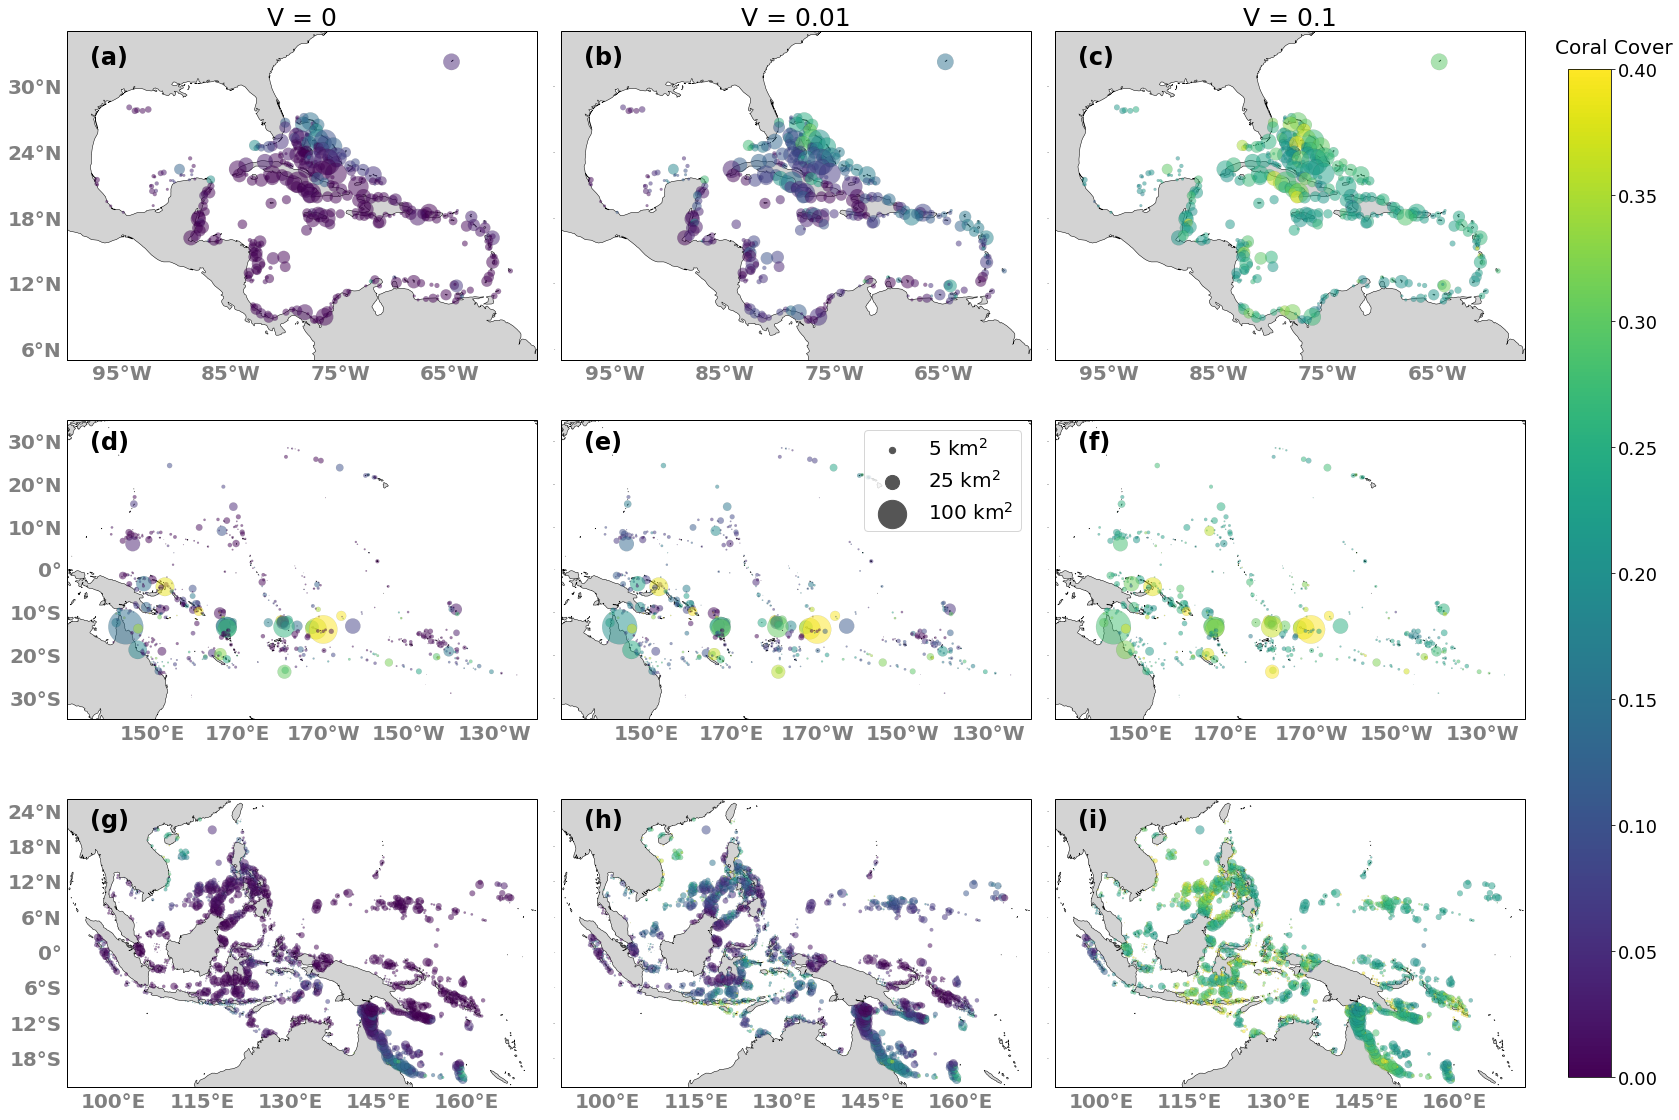

In [27]:

def main():
    fig, ax = plt.subplots(3, 3, figsize = (30,20))
    plt.subplots_adjust(wspace=0.05, hspace=0.1)
    np.vectorize(lambda ax:ax.axis('off'))(ax)
    
# V = 0
    # Caribbean
    ax[0,0] = fig.add_subplot(3,3, 1, projection=ccrs.PlateCarree())
    ax[0,0].set_extent([-100, -57, 5, 35], crs=ccrs.PlateCarree())
    land_50m = cfeature.NaturalEarthFeature('physical', 'coastline', '50m',
                                        edgecolor='black',linewidth = 0.5,
                                        facecolor='lightgray')
    ax[0,0].add_feature(land_50m)
    lat = np.genfromtxt("./Caribbean/input/Caribbean_lat.csv")
    lon = np.genfromtxt("./Caribbean/input/Caribbean_lon.csv")
    gl = ax[0,0].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 20, 'color': 'gray', 'weight': 'bold'}
    gl.ylabel_style = {'size': 20, 'color': 'gray', 'weight': 'bold'} 
    gl.xlocator = mticker.FixedLocator([-95, -85, -75, -65])
    sc = ax[0,0].scatter(lon, lat+0.05, c = min_cover_c_v0, cmap = 'viridis', vmin = 0, vmax = 0.4,s = Area_C/8000000, alpha = 0.5,linewidth = 0.1, edgecolor = 'k', label = 'reef patch', zorder = 2)
    ax[0,0].set_title('V = 0', fontsize = 25)
    ax[0,0].axis('off')
   
    # SWP
    ax[1,0] = fig.add_subplot(3,3, 4, projection=ccrs.PlateCarree(180))
    ax[1,0].set_extent([130,240, -35, 35], crs=ccrs.PlateCarree())
    land_50m = cfeature.NaturalEarthFeature('physical', 'coastline', '50m',
                                        edgecolor='black',linewidth = 0.5,
                                        facecolor='lightgray')
    ax[1,0].add_feature(land_50m)
    gl = ax[1,0].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 20, 'color': 'gray', 'weight': 'bold'}
    gl.ylabel_style = {'size': 20, 'color': 'gray', 'weight': 'bold'}
    gl.xlocator = mticker.FixedLocator([150, 170, -170, -150, -130])
    gl.ylocator = mticker.FixedLocator([-30, -20, -10,0, 10,20,30])
    lat = np.genfromtxt("./SouthwestPacific/input/SWP_lat.csv")
    lon = np.genfromtxt("./SouthwestPacific/input/SWP_lon.csv")
    sc = ax[1,0].scatter(lon+180, lat, c = min_cover_swp_v0, cmap = 'viridis', vmin = 0, vmax = 0.4,s = Area_SWP/8000000, alpha = 0.5,linewidth = 0.1, edgecolor = 'k', label = 'reef patch', zorder = 2)

    
    # CT
    ax[2,0] = fig.add_subplot(3,3, 7, projection=ccrs.PlateCarree())
    ax[2,0].set_extent([92,172, -23, 26], crs=ccrs.PlateCarree())
    land_50m = cfeature.NaturalEarthFeature('physical', 'coastline', '50m',
                                        edgecolor='black',linewidth = 0.5,
                                        facecolor='lightgray')
    ax[2,0].add_feature(land_50m)
    gl = ax[2,0].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 20, 'color': 'gray', 'weight': 'bold'}
    gl.ylabel_style = {'size': 20, 'color': 'gray', 'weight': 'bold'}
    gl.xlocator = mticker.FixedLocator([100, 115,130, 145, 160])
    lat = np.load("./CoralTriangle/input/Data_Lat_wholeCT_2083.npy")
    lon = np.load("./CoralTriangle/input/Data_Lon_wholeCT_2083.npy")
    sc = ax[2,0].scatter(lon, lat, c = min_cover_ct_v0, cmap = 'viridis', vmin = 0, vmax = 0.4,s = Area_CT/8000000, alpha = 0.5,linewidth = 0.1, edgecolor = 'k', label = 'reef patch', zorder = 2)
    fig.subplots_adjust(right=0.8)

# V = 0.01   
     # Caribbean
    ax[0,1] = fig.add_subplot(3,3, 2, projection=ccrs.PlateCarree())
    ax[0,1].set_extent([-100, -57, 5, 35], crs=ccrs.PlateCarree())
    land_50m = cfeature.NaturalEarthFeature('physical', 'coastline', '50m',
                                        edgecolor='black',linewidth = 0.5,
                                        facecolor='lightgray')
    ax[0,1].add_feature(land_50m)
    lat = np.genfromtxt("./Caribbean/input/Caribbean_lat.csv")
    lon = np.genfromtxt("./Caribbean/input/Caribbean_lon.csv")
    gl = ax[0,1].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 20, 'color': 'gray', 'weight': 'bold'}
    gl.ylabel_style = {'size': 0, 'color': 'gray', 'weight': 'bold'}
    gl.xlocator = mticker.FixedLocator([-95, -85, -75, -65])
    sc = ax[0,1].scatter(lon, lat+0.05, c = min_cover_c, cmap = 'viridis', vmin = 0, vmax = 0.4,s = Area_C/8000000, alpha = 0.5,linewidth = 0.1, edgecolor = 'k', label = 'reef patch', zorder = 2)
    ax[0,1].set_title('V = 0.01', fontsize = 25)
    ax[0,1].axis('off')
   
    # SWP
    ax[1,1] = fig.add_subplot(3,3, 5, projection=ccrs.PlateCarree(180))
    ax[1,1].set_extent([130,240, -35, 35], crs=ccrs.PlateCarree())
    land_50m = cfeature.NaturalEarthFeature('physical', 'coastline', '50m',
                                        edgecolor='black',linewidth = 0.5,
                                        facecolor='lightgray')
    ax[1,1].add_feature(land_50m)
    gl = ax[1,1].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 20, 'color': 'gray', 'weight': 'bold'}
    gl.ylabel_style = {'size': 0, 'color': 'gray', 'weight': 'bold'}
    gl.xlocator = mticker.FixedLocator([150, 170, -170, -150, -130])
    lat = np.genfromtxt("./SouthwestPacific/input/SWP_lat.csv")
    lon = np.genfromtxt("./SouthwestPacific/input/SWP_lon.csv")
    sc = ax[1,1].scatter(lon+180, lat, c = min_cover_swp, cmap = 'viridis', vmin = 0, vmax = 0.4,s = Area_SWP/8000000, alpha = 0.5, linewidth = 0.1, edgecolor = 'k', label = 'reef patch', zorder = 2)

    
    # CT
    ax[2,1] = fig.add_subplot(3,3, 8, projection=ccrs.PlateCarree())
    ax[2,1].set_extent([92,172, -23, 26], crs=ccrs.PlateCarree())
    land_50m = cfeature.NaturalEarthFeature('physical', 'coastline', '50m',
                                        edgecolor='black',linewidth = 0.5,
                                        facecolor='lightgray')
    ax[2,1].add_feature(land_50m)
    gl = ax[2,1].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 20, 'color': 'gray', 'weight': 'bold'}
    gl.ylabel_style = {'size': 0, 'color': 'gray', 'weight': 'bold'}
    gl.xlocator = mticker.FixedLocator([100, 115,130, 145, 160])
    lat = np.load("./CoralTriangle/input/Data_Lat_wholeCT_2083.npy")
    lon = np.load("./CoralTriangle/input/Data_Lon_wholeCT_2083.npy")
    sc = ax[2,1].scatter(lon, lat, c = min_cover_ct, cmap = 'viridis', vmin = 0, vmax = 0.4,s = Area_CT/8000000, alpha = 0.5, linewidth = 0.1, edgecolor = 'k', label = 'reef patch', zorder = 2)
    
# V = 0.1    
    # Caribbean
    ax[0,2] = fig.add_subplot(3,3, 3, projection=ccrs.PlateCarree())
    ax[0,2].set_extent([-100, -57, 5, 35], crs=ccrs.PlateCarree())
    land_50m = cfeature.NaturalEarthFeature('physical', 'coastline', '50m',
                                        edgecolor='black',linewidth = 0.5,
                                        facecolor='lightgray')
    ax[0,2].add_feature(land_50m)
    lat = np.genfromtxt("./Caribbean/input/Caribbean_lat.csv")
    lon = np.genfromtxt("./Caribbean/input/Caribbean_lon.csv")
    gl = ax[0,2].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 20, 'color': 'gray', 'weight': 'bold'}
    gl.ylabel_style = {'size': 0, 'color': 'gray', 'weight': 'bold'}
    gl.xlocator = mticker.FixedLocator([-95, -85, -75, -65])
    sc = ax[0,2].scatter(lon, lat+0.05, c = min_cover_c_v01, cmap = 'viridis', vmin = 0, vmax = 0.4,s = Area_C/8000000, alpha = 0.5,linewidth = 0.1, edgecolor = 'k', label = 'reef patch', zorder = 2)
    ax[0,2].set_title('V = 0.1', fontsize = 25)
    ax[0,2].axis('off')
   
    # SWP
    ax[1,2] = fig.add_subplot(3,3, 6, projection=ccrs.PlateCarree(180))
    ax[1,2].set_extent([130,240, -35, 35], crs=ccrs.PlateCarree())
    land_50m = cfeature.NaturalEarthFeature('physical', 'coastline', '50m',
                                        edgecolor='black',linewidth = 0.5,
                                        facecolor='lightgray')
    ax[1,2].add_feature(land_50m)
    gl = ax[1,2].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 20, 'color': 'gray', 'weight': 'bold'}
    gl.ylabel_style = {'size': 0, 'color': 'gray', 'weight': 'bold'}
    gl.xlocator = mticker.FixedLocator([150, 170, -170, -150, -130])
    lat = np.genfromtxt("./SouthwestPacific/input/SWP_lat.csv")
    lon = np.genfromtxt("./SouthwestPacific/input/SWP_lon.csv")
    sc = ax[1,2].scatter(lon+180, lat, c = min_cover_swp_v01, cmap = 'viridis', vmin = 0, vmax = 0.4,s = Area_SWP/8000000, alpha = 0.5, linewidth = 0.1, edgecolor = 'k', label = 'reef patch', zorder = 2)

    
    # CT
    ax[2,2] = fig.add_subplot(3,3, 9, projection=ccrs.PlateCarree())
    ax[2,2].set_extent([92,172, -23, 26], crs=ccrs.PlateCarree())
    land_50m = cfeature.NaturalEarthFeature('physical', 'coastline', '50m',
                                        edgecolor='black',linewidth = 0.5,
                                        facecolor='lightgray')
    ax[2,2].add_feature(land_50m)
    gl = ax[2,2].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 20, 'color': 'gray', 'weight': 'bold'}
    gl.ylabel_style = {'size': 0, 'color': 'gray', 'weight': 'bold'}
    gl.xlocator = mticker.FixedLocator([100, 115,130, 145, 160])
    lat = np.load("./CoralTriangle/input/Data_Lat_wholeCT_2083.npy")
    lon = np.load("./CoralTriangle/input/Data_Lon_wholeCT_2083.npy")
    sc = ax[2,2].scatter(lon, lat, c = min_cover_ct_v01, cmap = 'viridis', vmin = 0, vmax = 0.4,s = Area_CT/8000000, alpha = 0.5, linewidth = 0.1, edgecolor = 'k', label = 'reef patch', zorder = 2)
    #fig.suptitle('Minimum Coral Cover', fontsize = 18,x = 0.25, y = 0.92)
    #fig.suptitle('Initial Coral Cover', fontsize = 18,x = 0.75, y = 0.92)
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.82, 0.15, 0.02, 0.7])
    cbar = fig.colorbar(sc, cax=cbar_ax, alpha = 1.5)
    cbar.set_label('Coral Cover', labelpad=-45,y=1.03, rotation=0, fontsize = 20)
    cbar.set_alpha(1)
    cbar.draw_all()
    
    ax[0,0].annotate("(a)", xy=(0.05, 0.9), xycoords="axes fraction", fontsize = 24, fontweight='bold')
    ax[0,1].annotate("(b)", xy=(0.05, 0.9), xycoords="axes fraction", fontsize = 24, fontweight='bold')
    ax[0,2].annotate("(c)", xy=(0.05, 0.9), xycoords="axes fraction", fontsize = 24, fontweight='bold')
    ax[1,0].annotate("(d)", xy=(0.05, 0.9), xycoords="axes fraction", fontsize = 24, fontweight='bold')
    ax[1,1].annotate("(e)", xy=(0.05, 0.9), xycoords="axes fraction", fontsize = 24, fontweight='bold')
    ax[1,2].annotate("(f)", xy=(0.05, 0.9), xycoords="axes fraction", fontsize = 24, fontweight='bold')
    ax[2,0].annotate("(g)", xy=(0.05, 0.9), xycoords="axes fraction", fontsize = 24, fontweight='bold')
    ax[2,1].annotate("(h)", xy=(0.05, 0.9), xycoords="axes fraction", fontsize = 24, fontweight='bold')
    ax[2,2].annotate("(i)", xy=(0.05, 0.9), xycoords="axes fraction", fontsize = 24, fontweight='bold')
    
    
    gll = plt.scatter([],[], s=40, marker='o', color='#555555')
    gl = plt.scatter([],[], s=200, marker='o', color='#555555')
    ga = plt.scatter([],[], s=800, marker='o', color='#555555')

    ax[1,1].legend((gll,gl,ga),
        ('5 km$^2$', '25 km$^2$', '100 km$^2$'),
       scatterpoints=1,
       loc='upper right',
       ncol=1,
       fontsize=20)
    

    #fig.savefig('./output/initial&mincover_map.png',dpi=300, bbox_inches='tight')
if __name__ == '__main__':
    main()

# Figure S6

In [29]:
#Set working directory
os.chdir('/Users/pinskylab/Documents/GitHub/regional_coral_manuscript/R/python_to_R_csv/')

In [31]:
#Import data frame files
# Caribbean
df_Carib_B05V01 = pd.read_csv('./df_Carib45_b05_v01.csv')
df_Carib_B05V001 = pd.read_csv('./df_Carib45_b05_v001.csv')
df_Carib_B05V0 = pd.read_csv('./df_Carib45_b05_v0.csv')

df_Carib_B005V01 = pd.read_csv('./df_Carib45_b005_v01.csv')
df_Carib_B005V001 = pd.read_csv('./df_Carib45_b005_v001.csv')
df_Carib_B005V0 = pd.read_csv('./df_Carib45_b005_v0.csv')

df_Carib_B0V01 = pd.read_csv('./df_Carib45_b0_v01.csv')
df_Carib_B0V001 = pd.read_csv('./df_Carib45_b0_v001.csv')
df_Carib_B0V0 = pd.read_csv('./df_Carib45_b0_v0.csv')

# SWP
df_SWP_B05V01 = pd.read_csv('./df_SWP45_b05_v01.csv')
df_SWP_B05V001 = pd.read_csv('./df_SWP45_b05_v001.csv')
df_SWP_B05V0 = pd.read_csv('./df_SWP45_b05_v0.csv')

df_SWP_B005V01 = pd.read_csv('./df_SWP45_b005_v01.csv')
df_SWP_B005V001 = pd.read_csv('./df_SWP45_b005_v001.csv')
df_SWP_B005V0 = pd.read_csv('./df_SWP45_b005_v0.csv')

df_SWP_B0V01 = pd.read_csv('./df_SWP45_b0_v01.csv')
df_SWP_B0V001 = pd.read_csv('./df_SWP45_b0_v001.csv')
df_SWP_B0V0 = pd.read_csv('./df_SWP45_b0_v0.csv')


# CT
df_CT_B05V01 = pd.read_csv('./df_CT45_b05_v01.csv')
df_CT_B05V001 = pd.read_csv('./df_CT45_b05_v001.csv')
df_CT_B05V0 = pd.read_csv('./df_CT45_b05_v0.csv')

df_CT_B005V01 = pd.read_csv('./df_CT45_b005_v01.csv')
df_CT_B005V001 = pd.read_csv('./df_CT45_b005_v001.csv')
df_CT_B005V0 = pd.read_csv('./df_CT45_b005_v0.csv')

df_CT_B0V01 = pd.read_csv('./df_CT45_b0_v01.csv')
df_CT_B0V001 = pd.read_csv('./df_CT45_b0_v001.csv')
df_CT_B0V0 = pd.read_csv('./df_CT45_b0_v0.csv')

In [32]:
min_cover_B0 = pd.concat([df_Carib_B0V0['min_cover'],df_Carib_B0V001['min_cover'],df_Carib_B0V01['min_cover'], df_SWP_B0V0['min_cover'],df_SWP_B0V001['min_cover'],df_SWP_B0V01['min_cover'],df_CT_B0V0['min_cover'],df_CT_B0V001['min_cover'],df_CT_B0V01['min_cover']],axis = 0, keys=['Carib0', 'Carib0.05','Carib0.5','SWP0','SWP0.05','SWP0.5', 'CT0', 'CT0.05', 'CT0.5'])
min_cover_B0 = min_cover_B0.to_frame()
min_cover_B0['V'] = [0]*423+[0.01]*423+[0.1]*423+[0]*583+ [0.01]*583+ [0.1]*583+ [0]*2083+ [0.01]*2083+ [0.1]*2083
min_cover_B0['Region'] = ['Caribbean']*1269+['SWP']*1749+['CT']*6249

min_cover_B005 = pd.concat([df_Carib_B005V0['min_cover'],df_Carib_B005V001['min_cover'],df_Carib_B005V01['min_cover'], df_SWP_B005V0['min_cover'],df_SWP_B005V001['min_cover'],df_SWP_B005V01['min_cover'],df_CT_B005V0['min_cover'],df_CT_B005V001['min_cover'],df_CT_B005V01['min_cover']],axis = 0, keys=['Carib0', 'Carib0.01','Carib0.1','SWP0','SWP0.01','SWP0.1', 'CT0', 'CT0.01', 'CT0.1'])
min_cover_B005 = min_cover_B005.to_frame()
min_cover_B005['V'] = [0]*423+[0.01]*423+[0.1]*423+[0]*583+ [0.01]*583+ [0.1]*583+ [0]*2083+ [0.01]*2083+ [0.1]*2083
min_cover_B005['Region'] = ['Caribbean']*1269+['SWP']*1749+['CT']*6249

min_cover_B05 = pd.concat([df_Carib_B05V0['min_cover'],df_Carib_B05V001['min_cover'],df_Carib_B05V01['min_cover'], df_SWP_B05V0['min_cover'],df_SWP_B05V001['min_cover'],df_SWP_B05V01['min_cover'],df_CT_B05V0['min_cover'],df_CT_B05V001['min_cover'],df_CT_B05V01['min_cover']],axis = 0, keys=['Carib0', 'Carib0.05','Carib0.5','SWP0','SWP0.05','SWP0.5', 'CT0', 'CT0.05', 'CT0.5'])
min_cover_B05 = min_cover_B05.to_frame()
min_cover_B05['V'] = [0]*423+[0.01]*423+[0.1]*423+[0]*583+ [0.01]*583+ [0.1]*583+ [0]*2083+ [0.01]*2083+ [0.1]*2083
min_cover_B05['Region'] = ['Caribbean']*1269+['SWP']*1749+['CT']*6249

In [33]:
bins = [0,0.025,0.05,0.075,0.1,0.125,0.15,0.175,0.2,0.225,0.25,0.275,0.3,0.325,0.35,0.375,0.4,0.425,0.45,0.475,0.5,0.525, 0.55,0.575,0.6]

Text(0.5, 0.06, 'Minimum Cover')

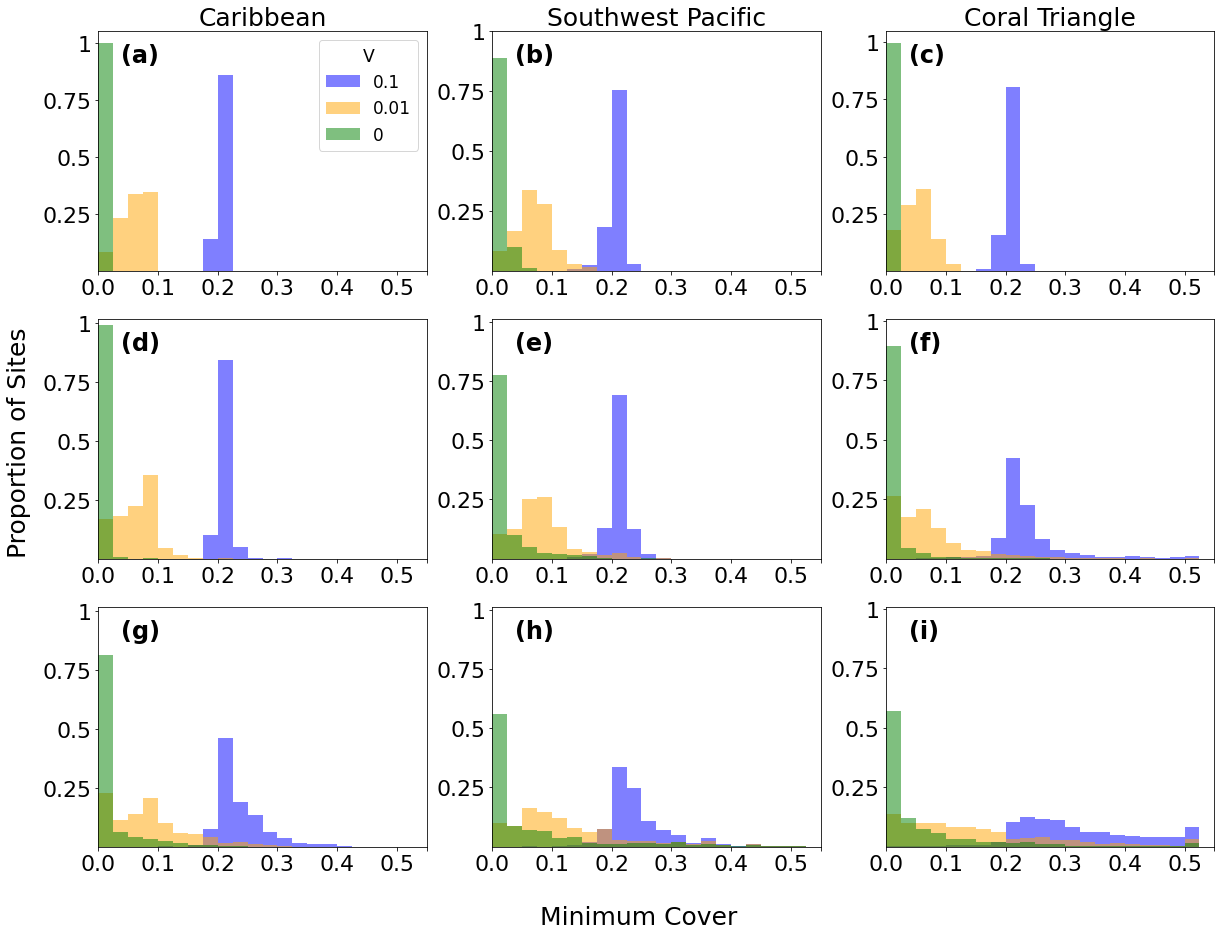

In [34]:
fig, ax = plt.subplots(3,3, figsize = (20,15))
ax[0,0].set_xlim(0,0.55)
ax[0,1].set_xlim(0,0.55)
ax[0,2].set_xlim(0,0.55)
ax[1,0].set_xlim(0,0.55)
ax[1,1].set_xlim(0,0.55)
ax[1,2].set_xlim(0,0.55)
ax[2,0].set_xlim(0,0.55)
ax[2,1].set_xlim(0,0.55)
ax[2,2].set_xlim(0,0.55)


min_region = min_cover_B0[min_cover_B0['Region'] == 'Caribbean']
v0 = min_region[min_region['V']==0.0]
v001 = min_region[min_region['V']==0.01]
v01 = min_region[min_region['V']==0.1]


ax[0,0].hist(v01['min_cover'], alpha = 0.5, bins=bins, color = 'blue')
ax[0,0].hist(v001['min_cover'], alpha = 0.5,bins=bins, color = 'orange')
ax[0,0].hist(v0['min_cover'], alpha = 0.5, bins=bins, color = 'green')

min_region = min_cover_B0[min_cover_B0['Region'] == 'SWP']
v0 = min_region[min_region['V']==0.0]
v001 = min_region[min_region['V']==0.01]
v01 = min_region[min_region['V']==0.1]

ax[0,1].hist(v01['min_cover'], alpha = 0.5, bins=bins, color = 'blue')
ax[0,1].hist(v001['min_cover'], alpha = 0.5,bins=bins, color = 'orange')
ax[0,1].hist(v0['min_cover'], alpha = 0.5, bins=bins, color = 'green')

min_region = min_cover_B0[min_cover_B0['Region'] == 'CT']
v0 = min_region[min_region['V']==0.0]
v001 = min_region[min_region['V']==0.01]
v01 = min_region[min_region['V']==0.1]

ax[0,2].hist(v01['min_cover'], alpha = 0.5, bins=bins, color = 'blue')
ax[0,2].hist(v001['min_cover'], alpha = 0.5,bins=bins, color = 'orange')
ax[0,2].hist(v0['min_cover'], alpha = 0.5, bins=bins, color = 'green')


min_region = min_cover_B005[min_cover_B005['Region'] == 'Caribbean']
v0 = min_region[min_region['V']==0.0]
v001 = min_region[min_region['V']==0.01]
v01 = min_region[min_region['V']==0.1]


ax[1,0].hist(v01['min_cover'], alpha = 0.5, bins=bins, color = 'blue')
ax[1,0].hist(v001['min_cover'], alpha = 0.5,bins=bins, color = 'orange')
ax[1,0].hist(v0['min_cover'], alpha = 0.5, bins=bins, color = 'green')

min_region = min_cover_B005[min_cover_B005['Region'] == 'SWP']
v0 = min_region[min_region['V']==0.0]
v001 = min_region[min_region['V']==0.01]
v01 = min_region[min_region['V']==0.1]

ax[1,1].hist(v01['min_cover'], alpha = 0.5, bins=bins, color = 'blue')
ax[1,1].hist(v001['min_cover'], alpha = 0.5,bins=bins, color = 'orange')
ax[1,1].hist(v0['min_cover'], alpha = 0.5, bins=bins, color = 'green')

min_region = min_cover_B005[min_cover_B005['Region'] == 'CT']
v0 = min_region[min_region['V']==0.0]
v001 = min_region[min_region['V']==0.01]
v01 = min_region[min_region['V']==0.1]

ax[1,2].hist(v01['min_cover'], alpha = 0.5, bins=bins, color = 'blue')
ax[1,2].hist(v001['min_cover'], alpha = 0.5,bins=bins, color = 'orange')
ax[1,2].hist(v0['min_cover'], alpha = 0.5, bins=bins, color = 'green')


min_region = min_cover_B05[min_cover_B05['Region'] == 'Caribbean']
v0 = min_region[min_region['V']==0.0]
v001 = min_region[min_region['V']==0.01]
v01 = min_region[min_region['V']==0.1]


ax[2,0].hist(v01['min_cover'], alpha = 0.5, bins=bins, color = 'blue')
ax[2,0].hist(v001['min_cover'], alpha = 0.5,bins=bins, color = 'orange')
ax[2,0].hist(v0['min_cover'], alpha = 0.5, bins=bins, color = 'green')

min_region = min_cover_B05[min_cover_B05['Region'] == 'SWP']
v0 = min_region[min_region['V']==0.0]
v001 = min_region[min_region['V']==0.01]
v01 = min_region[min_region['V']==0.1]

ax[2,1].hist(v01['min_cover'], alpha = 0.5, bins=bins, color = 'blue')
ax[2,1].hist(v001['min_cover'], alpha = 0.5,bins=bins, color = 'orange')
ax[2,1].hist(v0['min_cover'], alpha = 0.5, bins=bins, color = 'green')

min_region = min_cover_B05[min_cover_B05['Region'] == 'CT']
v0 = min_region[min_region['V']==0.0]
v001 = min_region[min_region['V']==0.01]
v01 = min_region[min_region['V']==0.1]

ax[2,2].hist(v01['min_cover'], alpha = 0.5, bins=bins, color = 'blue')
ax[2,2].hist(v001['min_cover'], alpha = 0.5,bins=bins, color = 'orange')
ax[2,2].hist(v0['min_cover'], alpha = 0.5, bins=bins, color = 'green')


ax[0,0].set_yticks([105,211,317,423])
ax[0,0].set_yticklabels(['0.25','0.5','0.75','1'], fontsize=22)
ax[0,1].set_yticks([146,292,437,583])
ax[0,1].set_yticklabels(['0.25','0.5','0.75','1'], fontsize=22)
ax[0,2].set_yticks([521,1042,1562,2083])
ax[0,2].set_yticklabels(['0.25','0.5','0.75','1'], fontsize=22)
ax[0,0].set_xticks([0.0,0.1,0.2,0.3,0.4,0.5,0.55])
ax[0,0].set_xticklabels([0.0,0.1,0.2,0.3,0.4,0.5], fontsize=22)
ax[0,1].set_xticks([0.0,0.1,0.2,0.3,0.4,0.5,0.55])
ax[0,1].set_xticklabels([0.0,0.1,0.2,0.3,0.4,0.5], fontsize=22)
ax[0,2].set_xticks([0.0,0.1,0.2,0.3,0.4,0.5,0.55])
ax[0,2].set_xticklabels([0.0,0.1,0.2,0.3,0.4,0.5], fontsize=22)
ax[0,0].set_title('Caribbean', fontsize = 25)
ax[0,1].set_title('Southwest Pacific', fontsize = 25)
ax[0,2].set_title('Coral Triangle', fontsize = 25)
ax[1,0].set_yticks([105,211,317,423])
ax[1,0].set_yticklabels(['0.25','0.5','0.75','1'], fontsize=22)
ax[1,1].set_yticks([146,292,437,583])
ax[1,1].set_yticklabels(['0.25','0.5','0.75','1'], fontsize=22)
ax[1,2].set_yticks([521,1042,1562,2083])
ax[1,2].set_yticklabels(['0.25','0.5','0.75','1'], fontsize=22)
ax[1,0].set_xticks([0.0,0.1,0.2,0.3,0.4,0.5,0.55])
ax[1,0].set_xticklabels([0.0,0.1,0.2,0.3,0.4,0.5], fontsize=22)
ax[1,1].set_xticks([0.0,0.1,0.2,0.3,0.4,0.5,0.55])
ax[1,1].set_xticklabels([0.0,0.1,0.2,0.3,0.4,0.5], fontsize=22)
ax[1,2].set_xticks([0.0,0.1,0.2,0.3,0.4,0.5,0.55])
ax[1,2].set_xticklabels([0.0,0.1,0.2,0.3,0.4,0.5], fontsize=22) 
ax[1,0].set_ylim(0,430)
ax[1,1].set_ylim(0,590)
ax[1,2].set_ylim(0,2100)
ax[2,0].set_yticks([105,211,317,423])
ax[2,0].set_yticklabels(['0.25','0.5','0.75','1'], fontsize=22)
ax[2,1].set_yticks([146,292,437,583])
ax[2,1].set_yticklabels(['0.25','0.5','0.75','1'], fontsize=22)
ax[2,2].set_yticks([521,1042,1562,2083])
ax[2,2].set_yticklabels(['0.25','0.5','0.75','1'], fontsize=22)
ax[2,0].set_xticks([0.0,0.1,0.2,0.3,0.4,0.5,0.55])
ax[2,0].set_xticklabels([0.0,0.1,0.2,0.3,0.4,0.5], fontsize=22)
ax[2,1].set_xticks([0.0,0.1,0.2,0.3,0.4,0.5,0.55])
ax[2,1].set_xticklabels([0.0,0.1,0.2,0.3,0.4,0.5], fontsize=22)
ax[2,2].set_xticks([0.0,0.1,0.2,0.3,0.4,0.5,0.55])
ax[2,2].set_xticklabels([0.0,0.1,0.2,0.3,0.4,0.5], fontsize=22) 
ax[2,0].set_ylim(0,430)
ax[2,1].set_ylim(0,590)
ax[2,2].set_ylim(0,2100)

ax[0,0].annotate("(a)", xy=(0.07, 0.87), xycoords="axes fraction", fontsize = 24, fontweight='bold')
ax[0,1].annotate("(b)", xy=(0.07, 0.87), xycoords="axes fraction", fontsize = 24, fontweight='bold')
ax[0,2].annotate("(c)", xy=(0.07, 0.87), xycoords="axes fraction", fontsize = 24, fontweight='bold')
ax[1,0].annotate("(d)", xy=(0.07, 0.87), xycoords="axes fraction", fontsize = 24, fontweight='bold')
ax[1,1].annotate("(e)", xy=(0.07, 0.87), xycoords="axes fraction", fontsize = 24, fontweight='bold')
ax[1,2].annotate("(f)", xy=(0.07, 0.87), xycoords="axes fraction", fontsize = 24, fontweight='bold')
ax[2,0].annotate("(g)", xy=(0.07, 0.87), xycoords="axes fraction", fontsize = 24, fontweight='bold')
ax[2,1].annotate("(h)", xy=(0.07, 0.87), xycoords="axes fraction", fontsize = 24, fontweight='bold')
ax[2,2].annotate("(i)", xy=(0.07, 0.87), xycoords="axes fraction", fontsize = 24, fontweight='bold')

                        
legend = ax[0,0].legend([0.1, 0.01,0], title = 'V')
plt.setp(legend.get_title(),fontsize='xx-large')
plt.rc('legend',**{'fontsize':20})

fig.text(0.07,0.5, 'Proportion of Sites', ha="center", va="center", fontsize = 25, rotation=90)
fig.text(0.5,0.06, 'Minimum Cover', ha="center", va="center", fontsize = 25)

# Figure S7

In [35]:
params = {'legend.fontsize': 17,
         # 'figure.figsize': (15, 5),
         'axes.labelsize': 25,
         'axes.titlesize':25,
         'xtick.labelsize':18,
         'ytick.labelsize':18}


pylab.rcParams.update(params)

In [36]:
N_Carib_all = N45_Carib[:,:,0]+N45_Carib[:,:,1]
N_SWP_all = N45_SWP[:,:,0]+N45_SWP[:,:,1]
N_CT_all = N45_CT[:,:,0]+N45_CT[:,:,1]


N_Carib_start = N_Carib_all[148,:]
N_SWP_start = N_SWP_all[148,:]
N_CT_start = N_CT_all[300,:]

N_Carib_min = N_Carib_all.min(axis = 0)
N_SWP_min = N_SWP_all.min(axis = 0)
N_CT_min = N_CT_all.min(axis = 0)

N_Carib_end = N_Carib_all[430,:]
N_SWP_end = N_SWP_all[430,:]
N_CT_end = N_CT_all[860,:]

Text(0.05, 0.93, '(c)')

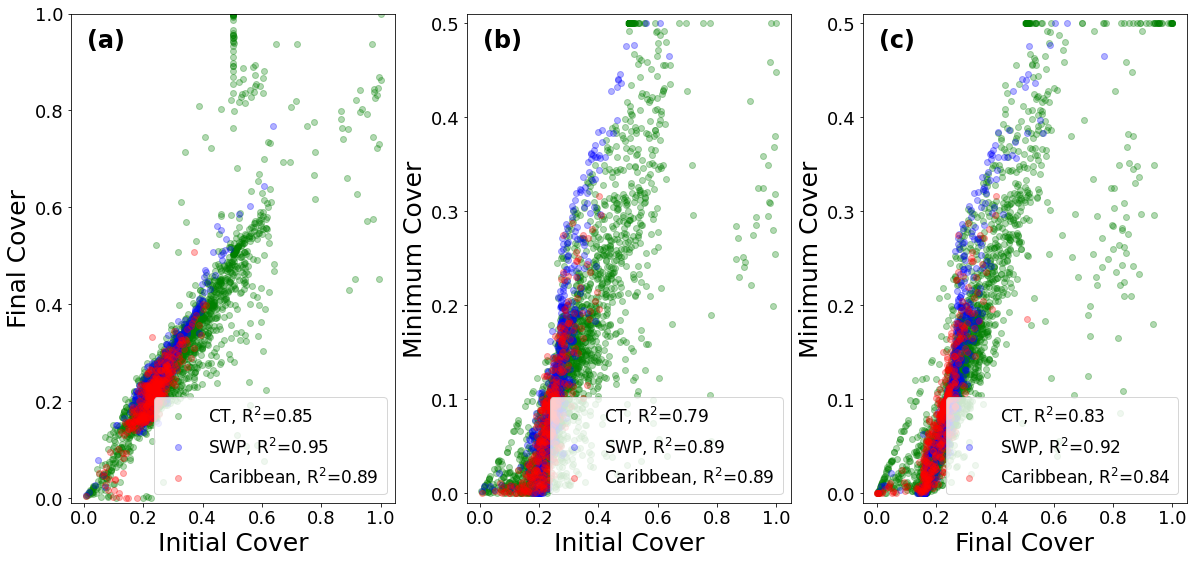

In [37]:
fig, axs = plt.subplots(1, 3, figsize = (20,9))
plt.subplots_adjust(wspace=0.22, hspace=0.4)

CT_col = 'g'
SWP_col = 'b'
C_col = 'r'

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(N_CT_start, N_CT_end)
axs[0].plot(N_CT_start, N_CT_end,'o', c = CT_col, alpha = 0.3,label = 'CT, R$^2$={:.2f} '.format(r_value))
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(N_SWP_start, N_SWP_end)
axs[0].plot(N_SWP_start, N_SWP_end,'o', c = SWP_col,alpha = 0.3, label = 'SWP, R$^2$={:.2f} '.format(r_value))
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(N_Carib_start, N_Carib_end)
axs[0].plot(N_Carib_start, N_Carib_end,'o', c = C_col, alpha = 0.3, label = 'Caribbean, R$^2$={:.2f} '.format(r_value))

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(N_CT_start, N_CT_min)
axs[1].plot(N_CT_start, N_CT_min,'o', c = CT_col, alpha = 0.3,label = 'CT, R$^2$={:.2f} '.format(r_value))
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(N_SWP_start, N_SWP_min)
axs[1].plot(N_SWP_start, N_SWP_min,'o', c = SWP_col,alpha = 0.3, label = 'SWP, R$^2$={:.2f} '.format(r_value))
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(N_Carib_start, N_Carib_end)
axs[1].plot(N_Carib_start, N_Carib_min,'o', c = C_col, alpha = 0.3, label = 'Caribbean, R$^2$={:.2f} '.format(r_value))

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(N_CT_end, N_CT_min)
axs[2].plot(N_CT_end,N_CT_min,'o', c = CT_col, alpha = 0.3,label = 'CT, R$^2$={:.2f} '.format(r_value))
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(N_SWP_end, N_SWP_min)
axs[2].plot(N_SWP_end,N_SWP_min,'o', c = SWP_col,alpha = 0.3, label = 'SWP, R$^2$={:.2f} '.format(r_value))
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(N_Carib_end, N_Carib_min)
axs[2].plot(N_Carib_end,N_Carib_min,'o', c = C_col, alpha = 0.3, label = 'Caribbean, R$^2$={:.2f} '.format(r_value))


axs[0].set_ylim(-0.01,1)
axs[1].set_ylim(-0.01,0.51)
axs[2].set_ylim(-0.01,0.51)
axs[0].legend(loc='lower right')
axs[1].legend(loc='lower right')
axs[2].legend(loc='lower right')

axs[0].set_xlabel('Initial Cover' , fontsize = 25)
axs[0].set_ylabel('Final Cover', fontsize = 25)
#axs[0].set_title('', fontsize = 25)

axs[1].set_xlabel('Initial Cover' , fontsize = 25)
axs[1].set_ylabel('Minimum Cover', fontsize = 25)

axs[2].set_xlabel('Final Cover' , fontsize = 25)
axs[2].set_ylabel('Minimum Cover', fontsize = 25)

axs[0].annotate("(a)", xy=(0.05, 0.93), xycoords="axes fraction", fontsize = 24, fontweight='bold')
axs[1].annotate("(b)", xy=(0.05, 0.93), xycoords="axes fraction", fontsize = 24, fontweight='bold')
axs[2].annotate("(c)", xy=(0.05, 0.93), xycoords="axes fraction", fontsize = 24, fontweight='bold')


# Figure S9

In [38]:
all_data85 = pd.read_csv('./model_summary_table_allregions85.csv')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the swarmplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


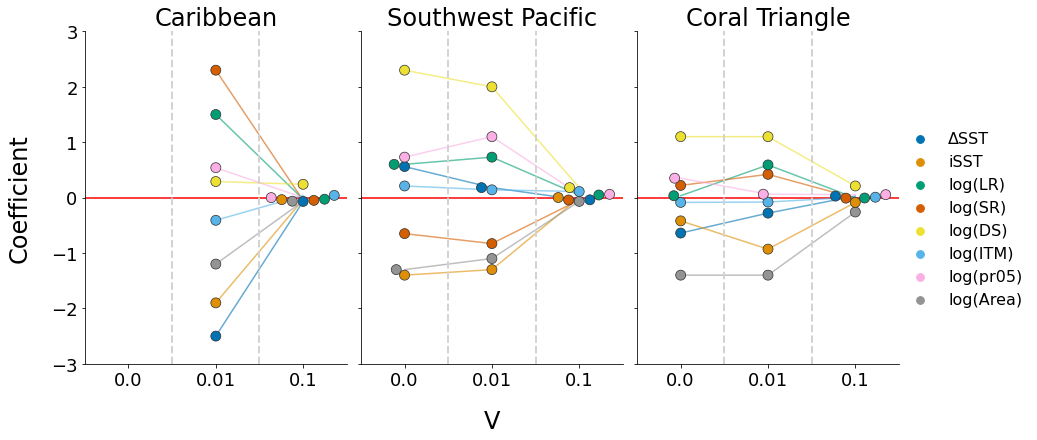

In [39]:
#create colorblind palette
colorblind = [u'#0173b2', u'#de8f05', u'#029e73', u'#d55e00', u'#ece133', u'#56b4e9', u'#fbafe4', u'#949494']

#plot
g = sns.relplot(x="V2", y="Full", col = 'Region', kind = "line",linewidth = 1.5, hue = "Variable", palette = colorblind, height=6, aspect=.7, data=all_data85, legend  = False, alpha = 0.6)
g.map(plt.axvline, x = 0.5, linewidth = 2, linestyle = '--', color = 'lightgray')
g.map(plt.axvline, x = 1.5, linewidth = 2,linestyle = '--', color = 'lightgray')
g.map(sns.swarmplot, "V", "Full", data = all_data85, hue = "Variable",palette = colorblind,edgecolor = "gray", linewidth = 0.7,size = 10)
g.set(xticklabels=['0.0','0.01', '0.1'], xlabel = "V", ylabel = "coefficient")
g.add_legend(label_order = all_data85.iloc[0:8,1], fontsize = 16)
new_labels = ['ΔSST', 'iSST', 'log(LR)', 'log(SR)', 'log(DS)', 'log(ITM)','log(pr05)','log(Area)']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
ax1, ax2, ax3 = g.axes[0]
g.set(ylim=(-3, 3))
axes = g.axes.flatten()
axes[0].set_title('Caribbean', fontsize = 24)
axes[1].set_title('Southwest Pacific', fontsize = 24)
axes[2].set_title('Coral Triangle', fontsize = 24)
axes[0].set_xlabel('')
axes[1].set_xlabel('V',fontsize = 24, labelpad = 20)
axes[2].set_xlabel('')
axes[0].set_ylabel('Coefficient',fontsize = 24, labelpad = 20)
ax1.axhline(0, ls='-', color = 'red', zorder = 0)
ax2.axhline(0, ls='-', color = 'red', zorder = 0)
ax3.axhline(0, ls='-', color = 'red', zorder = 0)

#g.savefig('/Users/pinskylab/Documents/GitHub/Regional_Coral/output/Coef_swarmplot.png',dpi=300, bbox_inches='tight')#

# Figure S8 and S10 were produced in R markdown documents